In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msgn
import resources
import numpy as np


test = pd.read_csv('data/TestSet.csv')
train = pd.read_csv('data/TrainingSet.csv')

# 1. Load the dataset, perform an exhaustive EDA, and prepare it for a classification task to build a Duration predictive model. It is noteworthy the ordinal nature of the target.

In [2]:
train.info()
print(f'shape: {train.shape}')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251034 entries, 0 to 251033
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   case_id                251034 non-null  int64  
 1   Spitex_Institute_code  251034 non-null  int64  
 2   Spitex_type_code       251034 non-null  object 
 3   District_code          251034 non-null  int64  
 4   City_code              251034 non-null  object 
 5   Available_nurse        251034 non-null  int64  
 6   Treatment              251034 non-null  object 
 7   Team_code              251034 non-null  object 
 8   Team_location_code     251034 non-null  object 
 9   Team_members           251034 non-null  float64
 10  patient_id             251034 non-null  int64  
 11  City_code_patient      251034 non-null  float64
 12  Type_admission         251034 non-null  object 
 13  Severity               251034 non-null  object 
 14  Patient_network        251034 non-nu

In [3]:
train.head(1)

,case_id,Spitex_Institute_code,Spitex_type_code,District_code,City_code,Available_nurse,Treatment,Team_code,Team_location_code,Team_members,patient_id,City_code_patient,Type_admission,Severity,Patient_network,Age,Deposit,Duration
0,182309,19,a,7,Y,3,radiotherapy,Q,C,1.0,19951,8.0,Emergency,Moderate,6,81-90,3270.0,31-40


/opt/homebrew/lib/python3.11/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/opt/homebrew/lib/python3.11/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/opt/homebrew/lib/python3.11/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/opt/homebrew/lib/python3.11/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/opt/homebrew/lib/python3.11/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/opt/homebrew/lib/python3.11/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because n

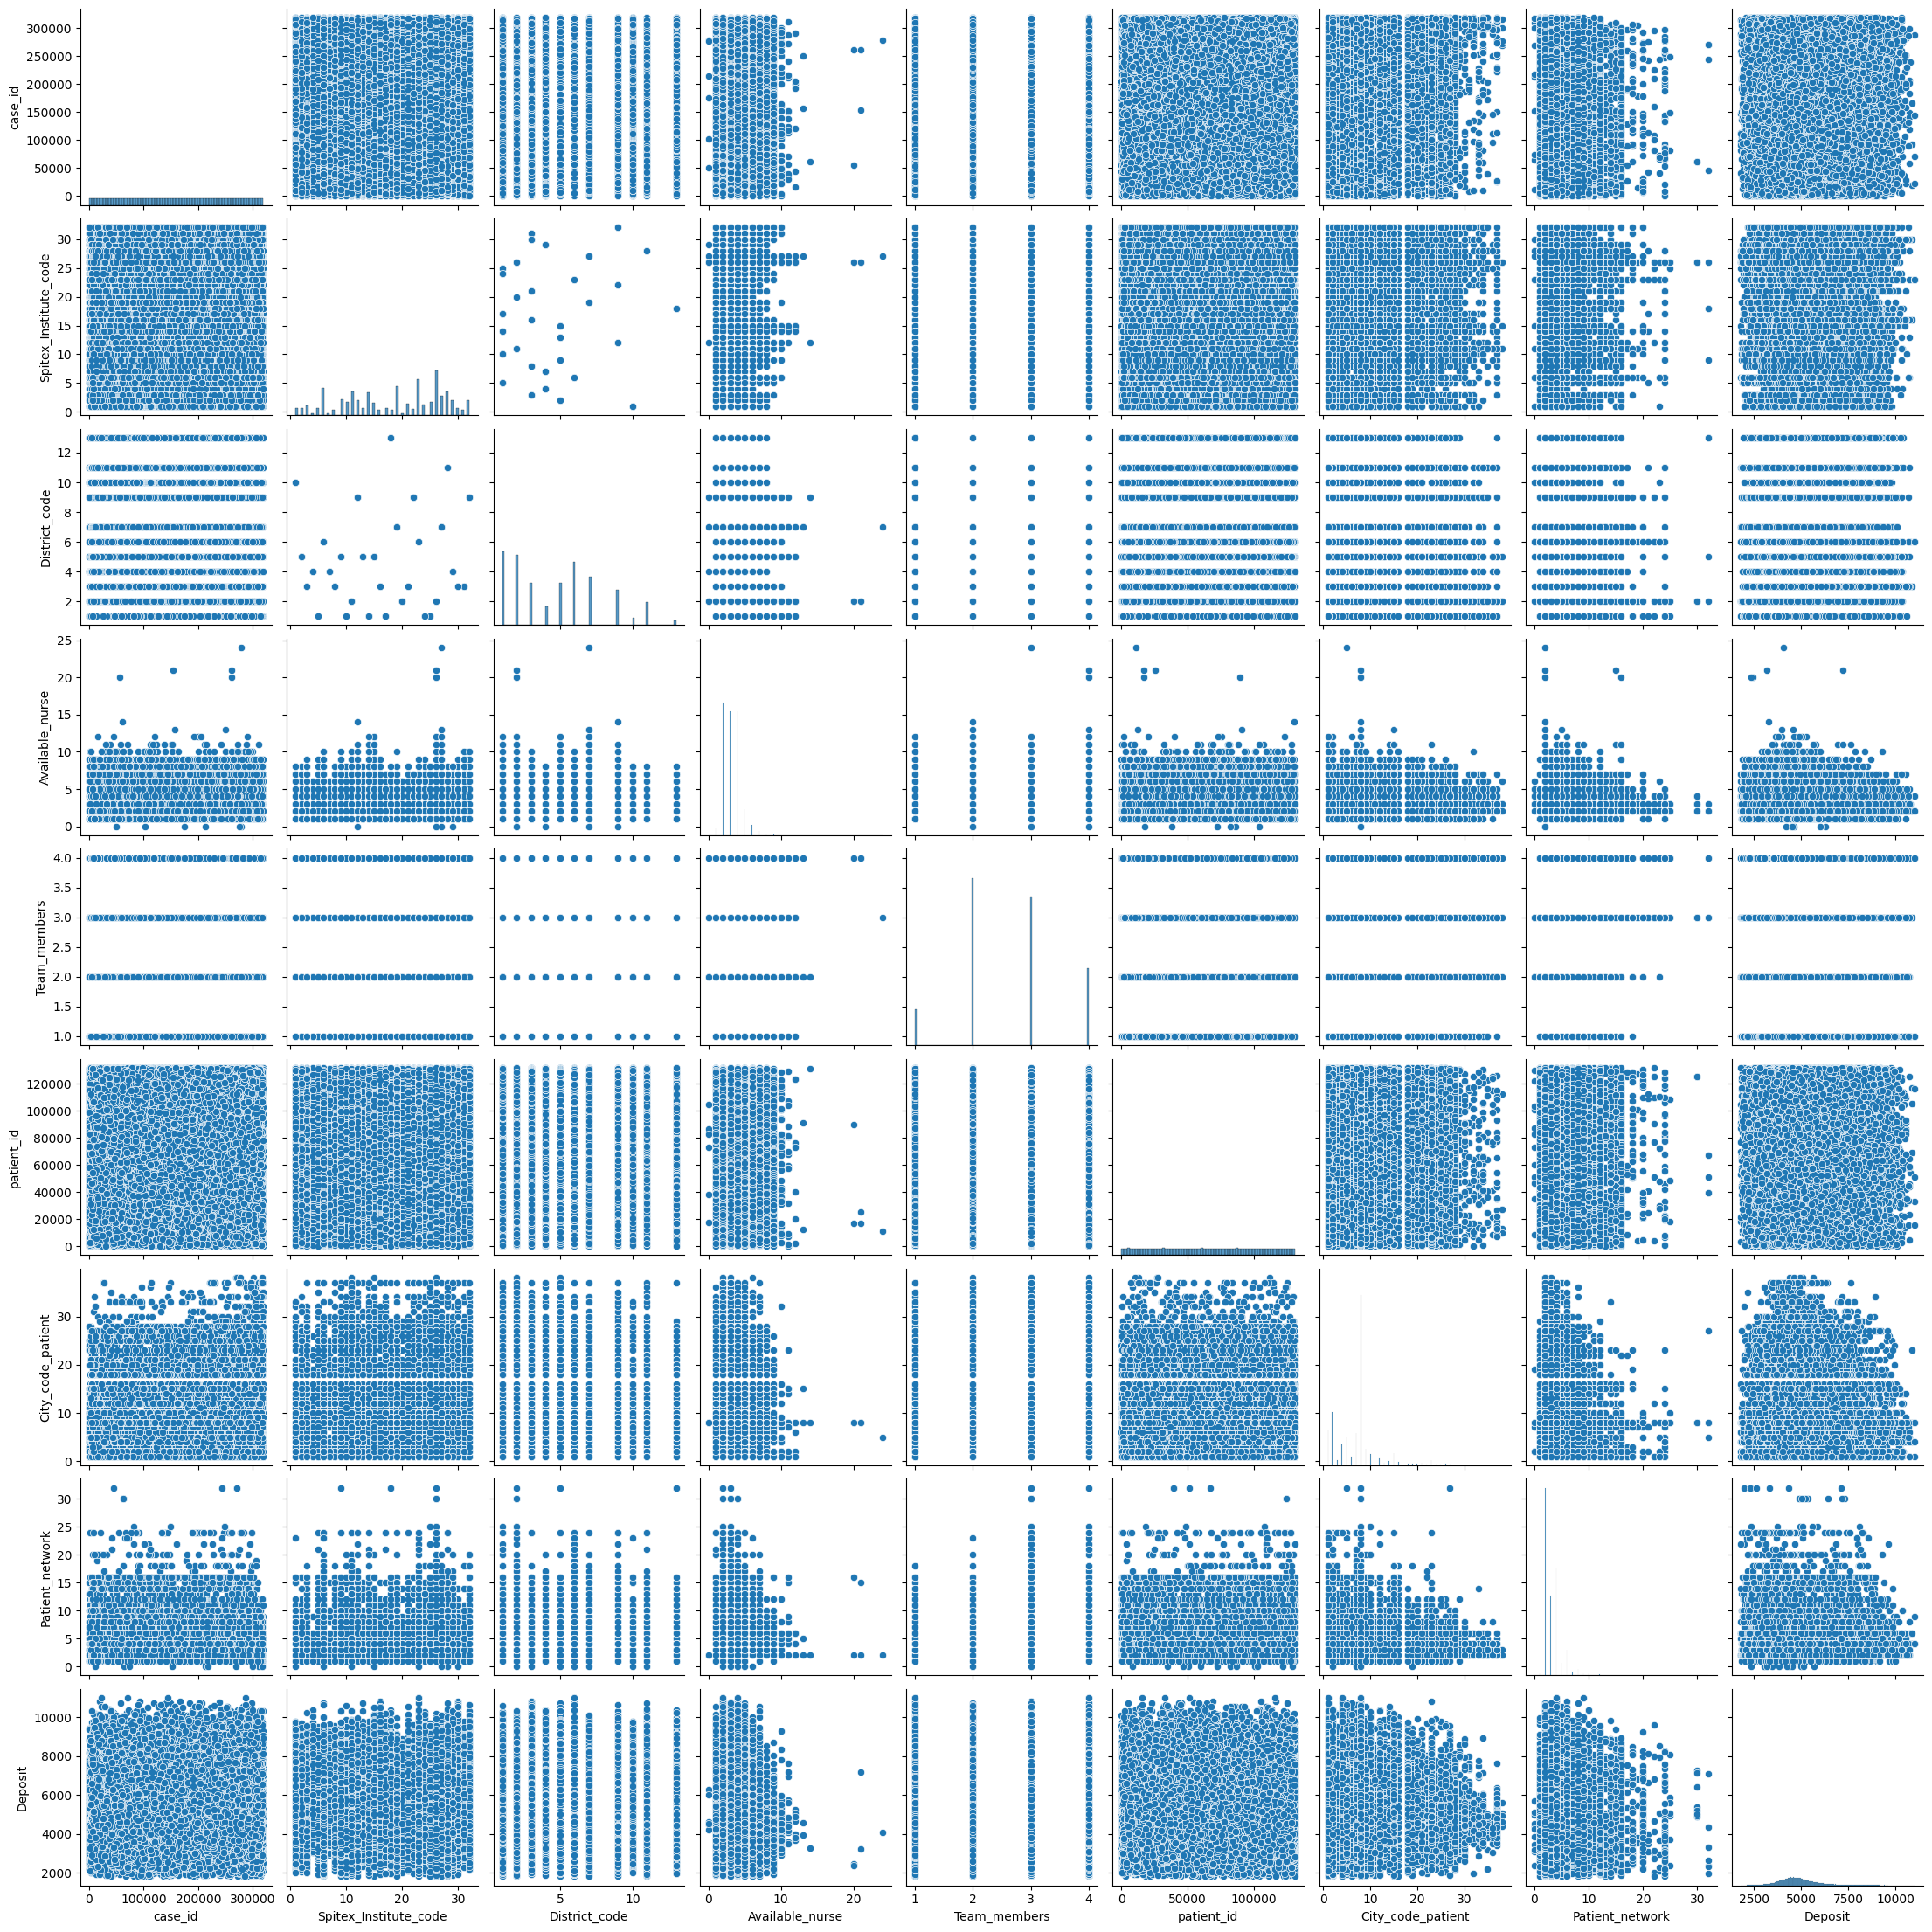

In [4]:
plt.show(sns.pairplot(train, palette="Set2"))


The pairplots don't highlight any linear correlation

<Figure size 1000x1000 with 0 Axes>

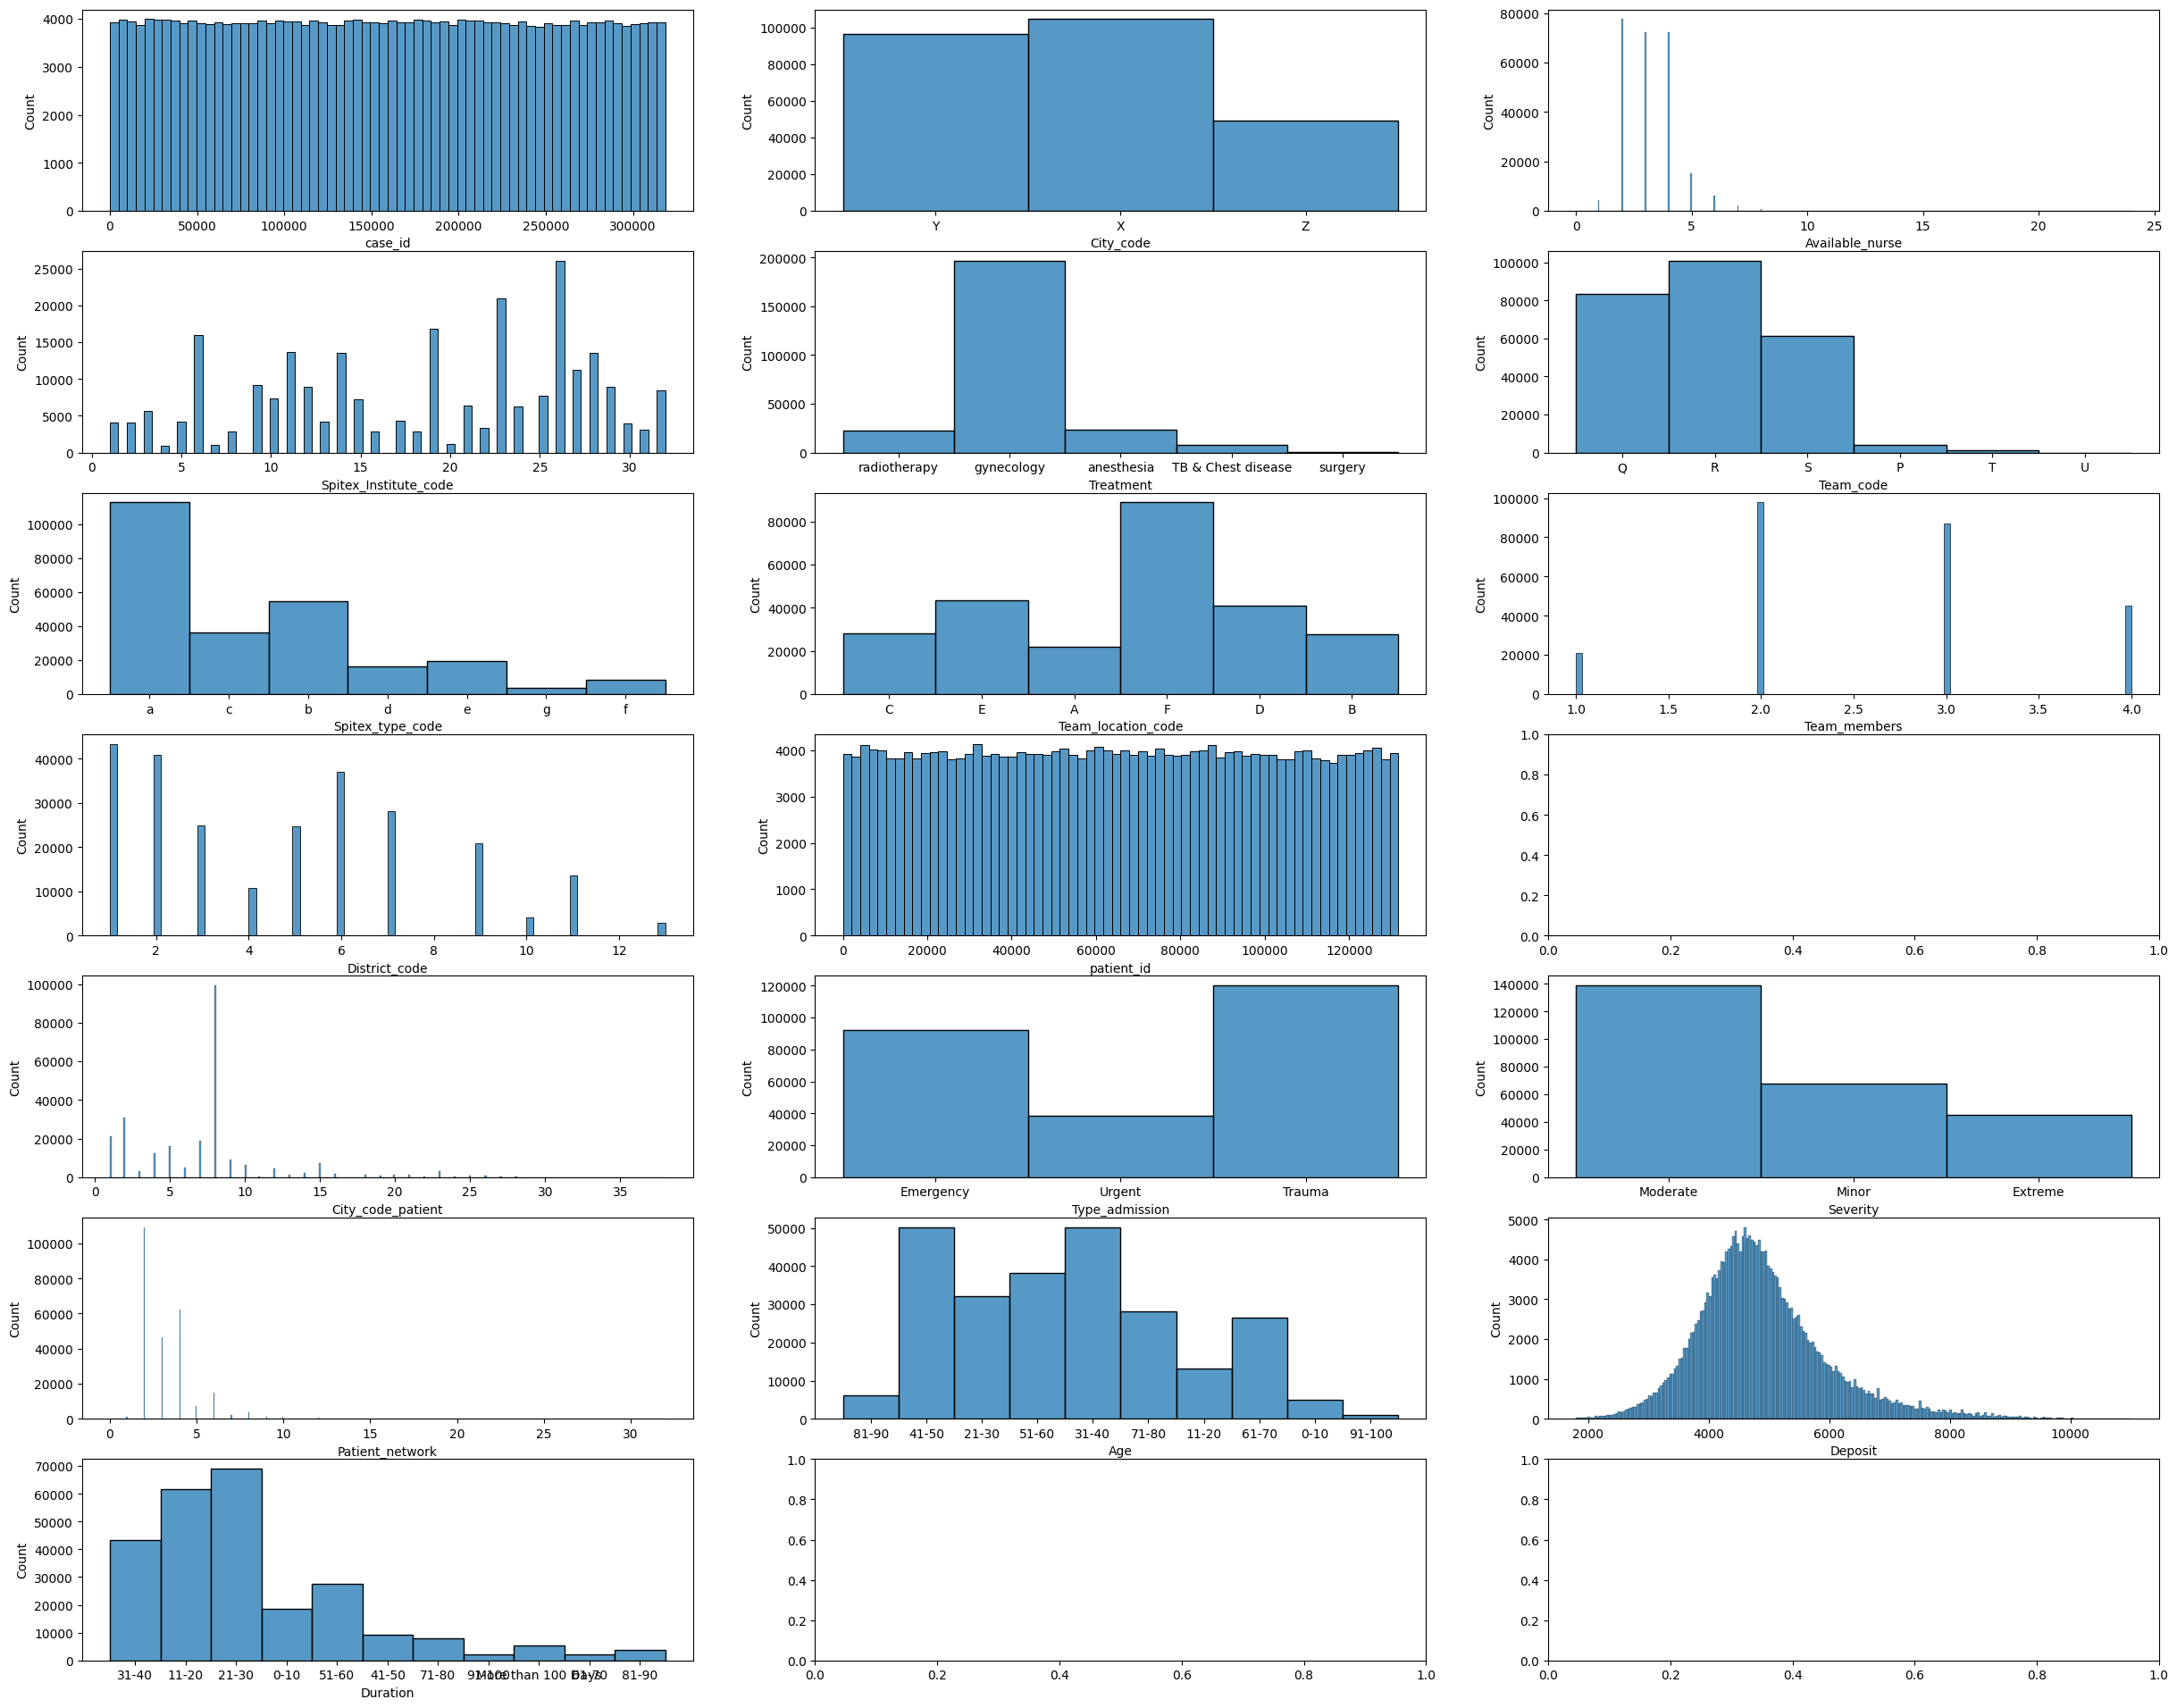

In [5]:
from resources.helpers import histplot

histplot(train)

feature distibutions are mostly irregular. The target follows a poisson distribution and the deposit distribution is skewed

### Target variable 

([], [])

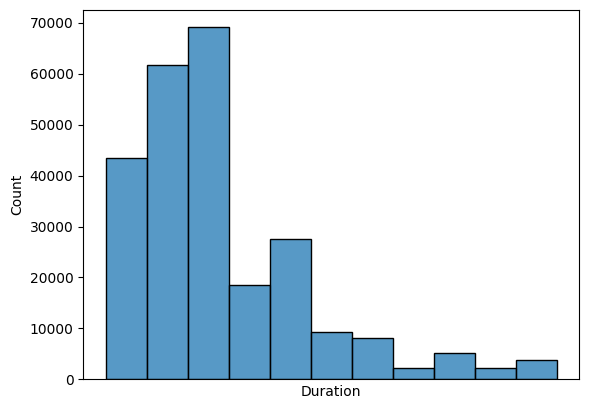

In [6]:
sns.histplot(train['Duration'])
plt.xticks(ticks=[], labels=[])


In [7]:
train['Duration'].value_counts(normalize=True)

Duration
21-30                 0.275074
11-20                 0.245688
31-40                 0.173084
51-60                 0.109826
0-10                  0.074094
41-50                 0.036780
71-80                 0.032175
More than 100 Days    0.020866
81-90                 0.015173
91-100                0.008644
61-70                 0.008596
Name: proportion, dtype: float64

Categories are unbalanced, especially the categories with the highest age ranges and the one with the lowest one

### Missing values

<Axes: >

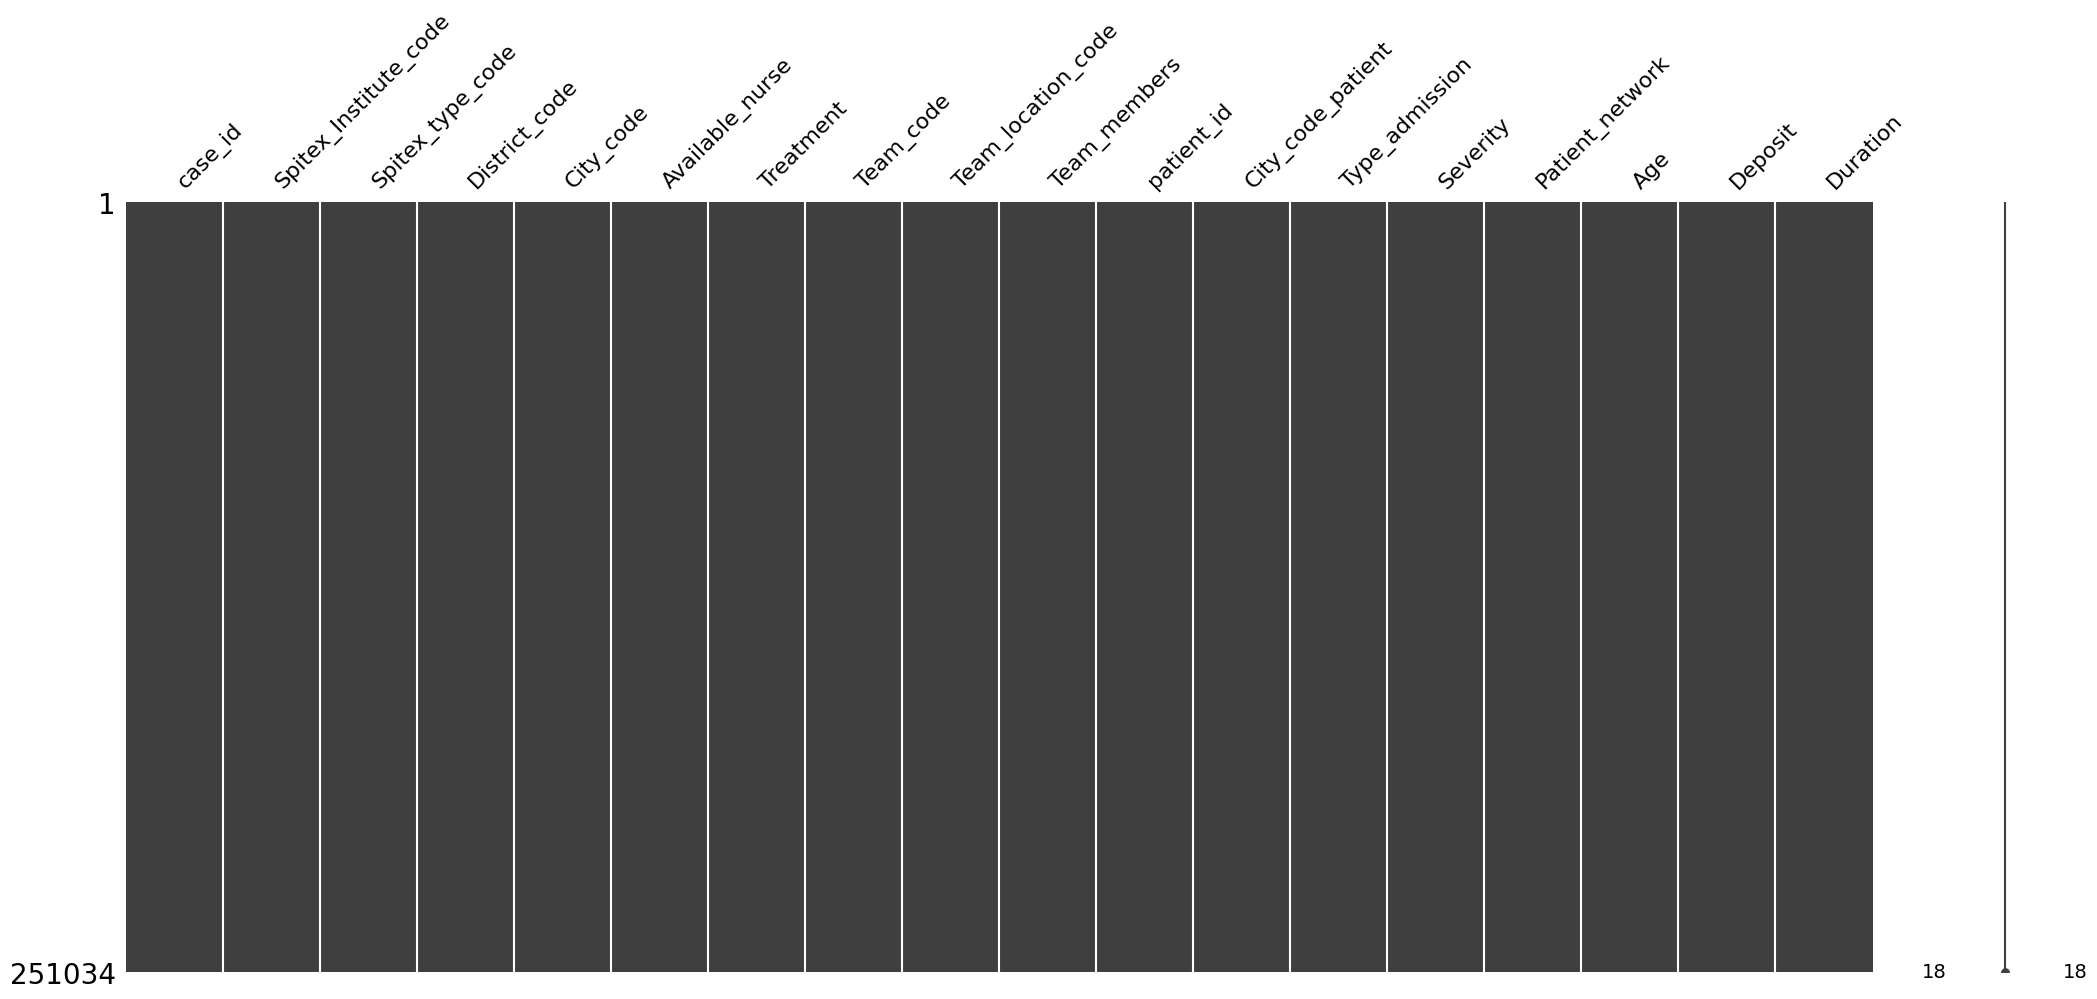

In [8]:
msgn.matrix(train)

no missing values in the data

### Drop uninformative columns

In [9]:
train.drop('case_id',axis=1 ,inplace=True)
train.drop('patient_id',axis=1,inplace=True)

test.drop('case_id', axis=1,inplace=True)
test.drop('patient_id', axis=1,inplace=True)



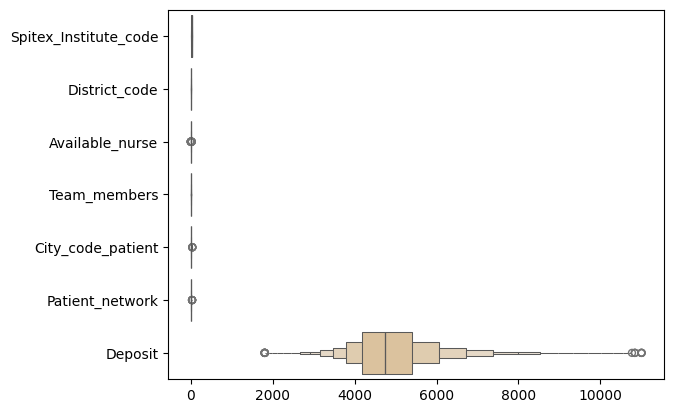

In [10]:
plt.show(sns.boxenplot(data=train, orient="h",palette="Set2"))


The boxplot higlights a great difference in the scale of the deposit feature compared to the other features

## Outliers


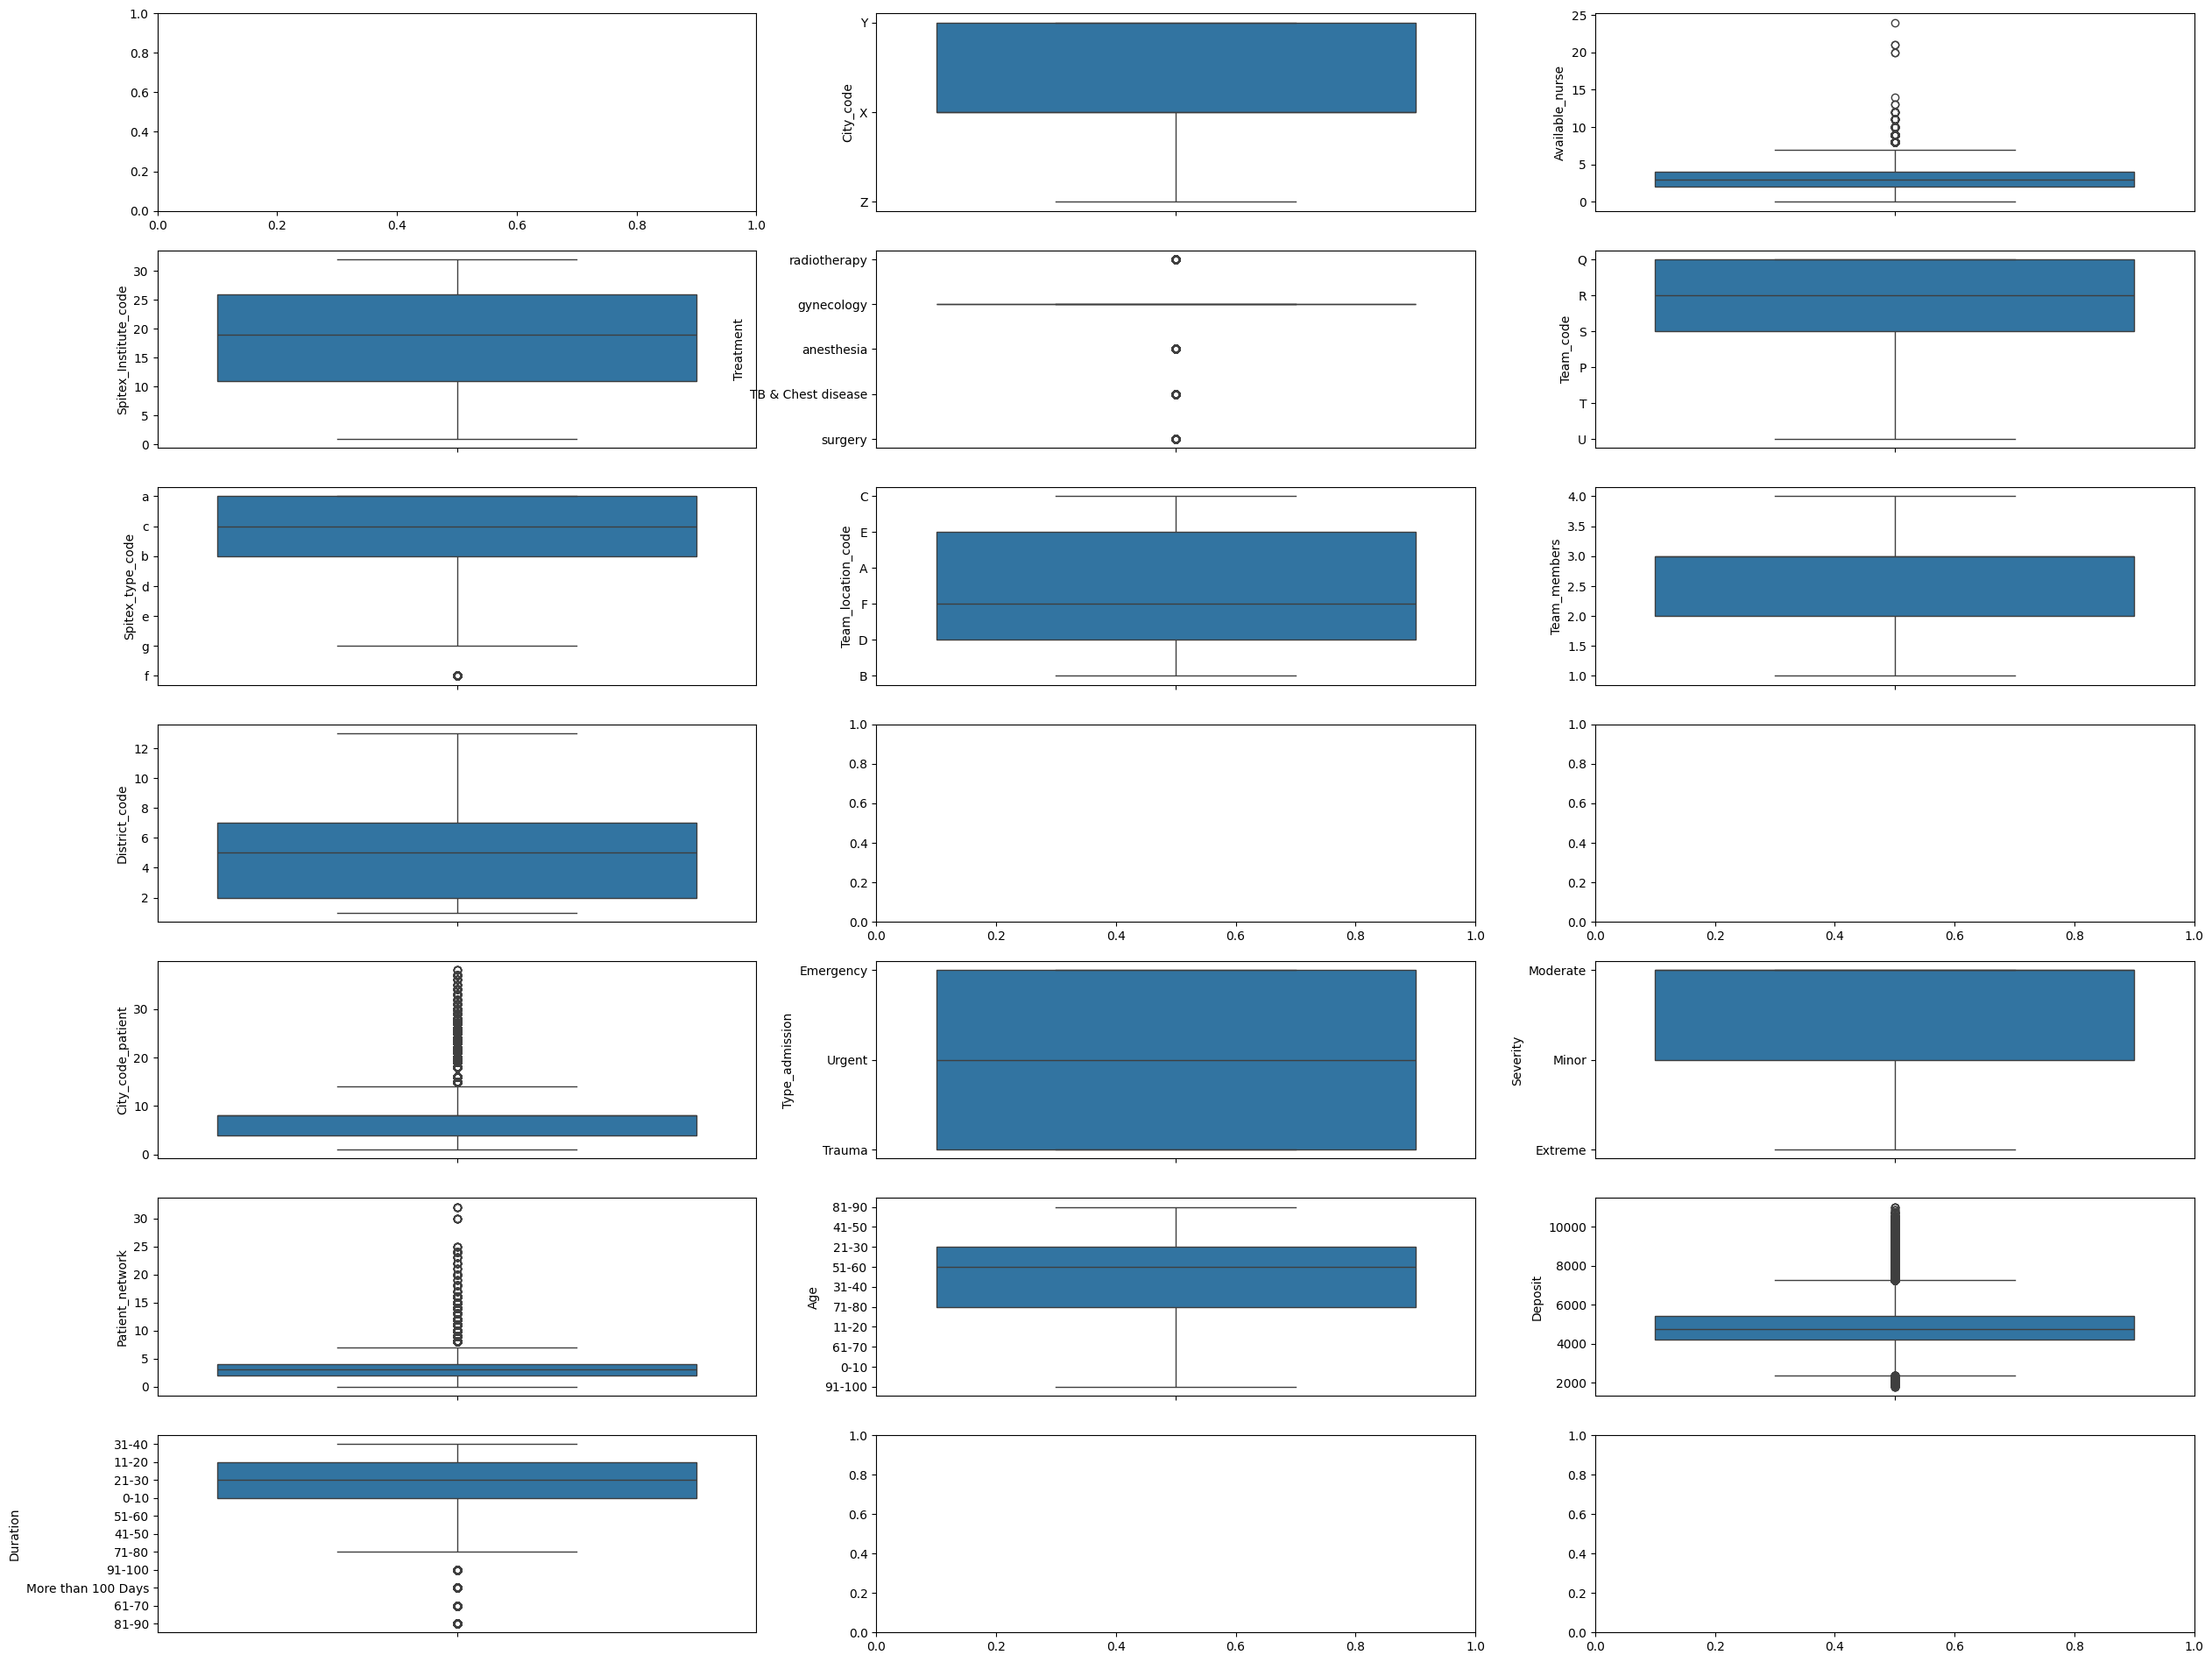

In [11]:
from resources.helpers import boxplot

boxplot(train)


from the boxplots we can see that the fields with outliers are : 'Duration', 'Deposit', 'Available_nurse', 'City_code_patient', 'Patient_network' and 'Treatment'. I will only modify the numerical ones that do not correspond to codes. Also i will not modify the target (Duration)

In [12]:
k = 3

upper_lim_deposit = train['Deposit'].mean () + train['Deposit'].std () * k
lower_lim_deposit = train['Deposit'].mean () - train['Deposit'].std () * k

upper_lim_Available_nurse = train['Available_nurse'].mean () + train['Available_nurse'].std () * k
lower_lim_Available_nurse = train['Available_nurse'].mean () - train['Available_nurse'].std () * k

upper_lim_Patient_network = train['Patient_network'].mean () + train['Patient_network'].std () * k
lower_lim_Patient_network = train['Patient_network'].mean () - train['Patient_network'].std () * k




test = test[(test['Deposit'] < upper_lim_deposit) & (test['Deposit'] > lower_lim_deposit)]
test = test[(test['Available_nurse'] < upper_lim_Available_nurse) & (test['Available_nurse'] > lower_lim_Available_nurse)]
test = test[(test['Patient_network'] < upper_lim_Patient_network) & (test['Patient_network'] > lower_lim_Patient_network)]

test = test[(test['Deposit'] < upper_lim_deposit) & (test['Deposit'] > lower_lim_deposit)]
test = test[(test['Available_nurse'] < upper_lim_Available_nurse) & (test['Available_nurse'] > lower_lim_Available_nurse)]
test = test[(test['Patient_network'] < upper_lim_Patient_network) & (test['Patient_network'] > lower_lim_Patient_network)]

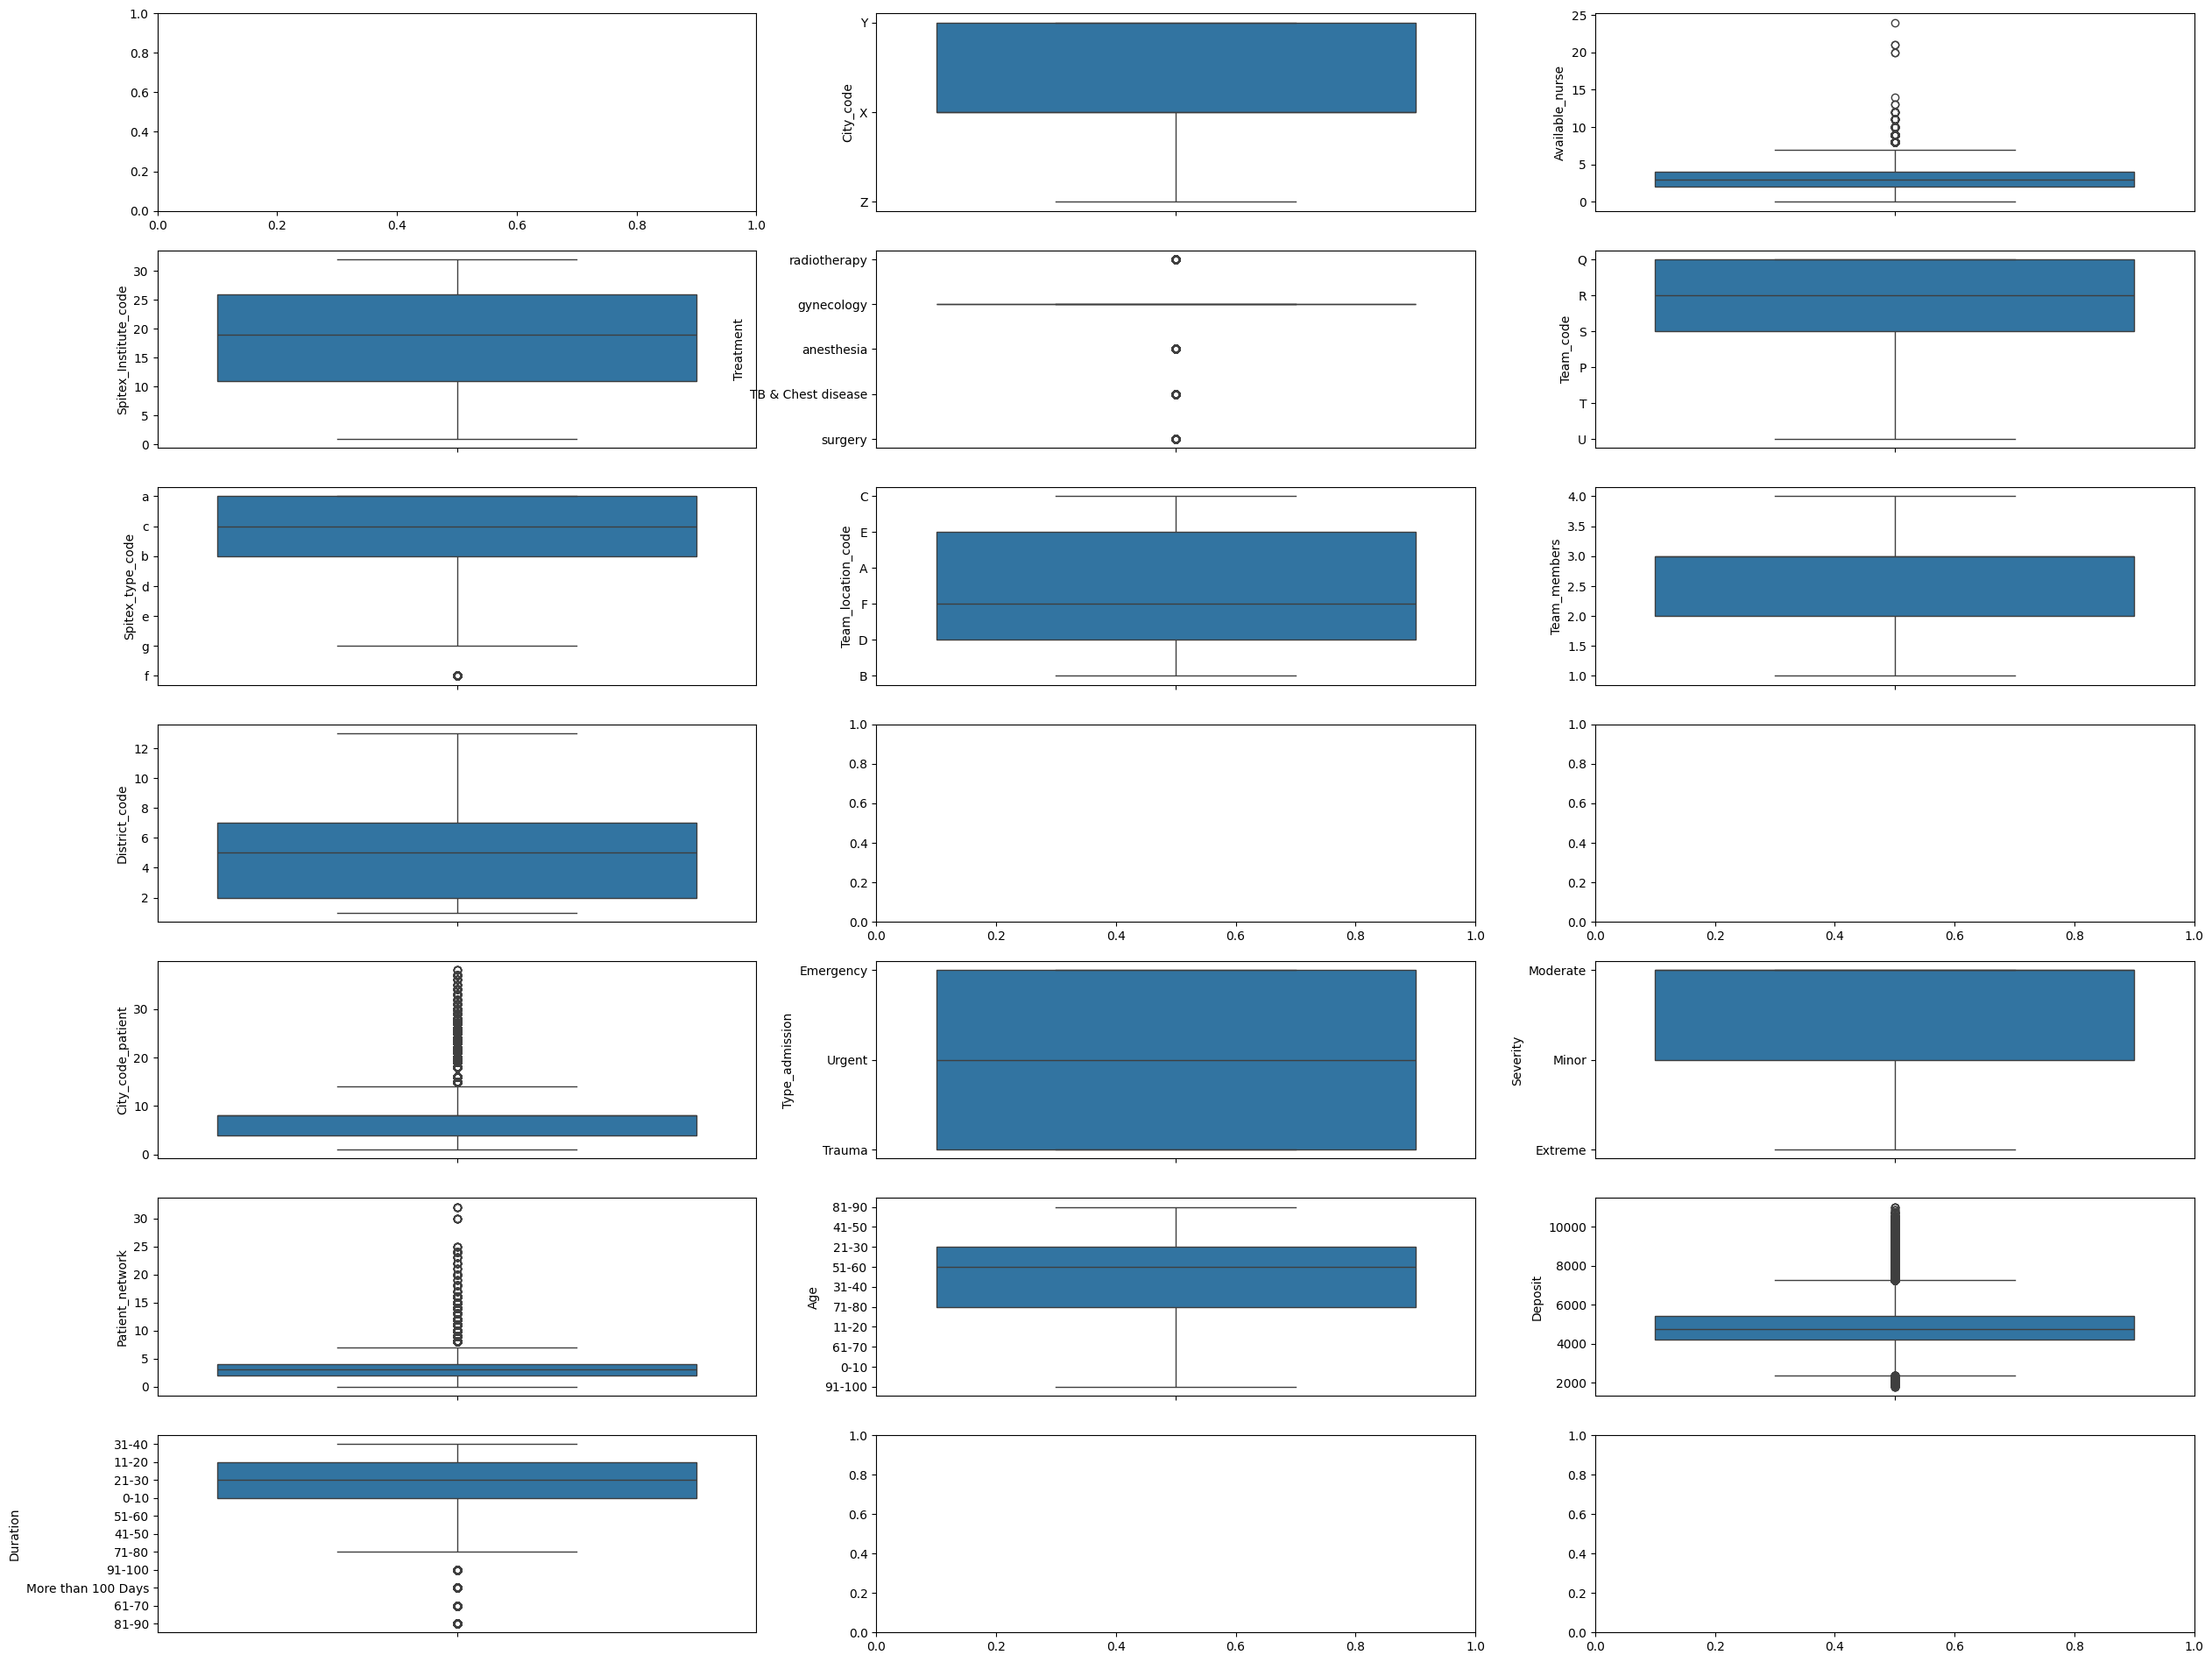

In [13]:
boxplot(train)


The boxplots do not change as no data is removed from the dataset. An attempt was made to handle the outliears more strictly (k = 2) but this did not improve the models' performances. Therefore i decided to keep the data instead of dropping it as it would mean loosing information

In [ ]:
train.reset_index(inplace=True, drop=True)


### Encoding

In [15]:
train.head(1)

,Spitex_Institute_code,Spitex_type_code,District_code,City_code,Available_nurse,Treatment,Team_code,Team_location_code,Team_members,City_code_patient,Type_admission,Severity,Patient_network,Age,Deposit,Duration
0,19,a,7,Y,3,radiotherapy,Q,C,1.0,8.0,Emergency,Moderate,6,81-90,3270.0,31-40


In [16]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder


categorical_features = ['Spitex_type_code', 'City_code', 'Treatment', 'Team_code', 'Team_location_code', 'Type_admission']  

one_hot_encoder = OneHotEncoder()

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', one_hot_encoder, categorical_features)  
    ],
    remainder='passthrough'  
)

train_encoded = preprocessor.fit_transform(train)
test_encoded = preprocessor.transform(test)  # Assuming 'test' is your test dataset

new_columns = preprocessor.transformers_[0][1].get_feature_names_out(categorical_features) \
              .tolist() + train.drop(columns=categorical_features).columns.tolist()

train = pd.DataFrame(train_encoded, columns=new_columns)
test = pd.DataFrame(test_encoded, columns=new_columns)



dictionary={"Severity": {"Minor":0, "Moderate":1, "Extreme":2}, "Age": {"0-10":0, "11-20":1, "21-30":2, "31-40": 3 , "41-50": 4, "51-60": 5 , "61-70": 6, "71-80": 7,"81-90": 8, "91-100": 9 }}
train.replace(dictionary, inplace=True)
test.replace(dictionary, inplace=True)




In [17]:
train.head(1)

,Spitex_type_code_a,Spitex_type_code_b,Spitex_type_code_c,Spitex_type_code_d,Spitex_type_code_e,Spitex_type_code_f,Spitex_type_code_g,City_code_X,City_code_Y,City_code_Z,...,Spitex_Institute_code,District_code,Available_nurse,Team_members,City_code_patient,Severity,Patient_network,Age,Deposit,Duration
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,19,7,3,1.0,8.0,1,6,8,3270.0,31-40


## Binning

In [20]:
# BINNING FOR V2 of logistic and V1 of the rest

def label_duration(duration_str):

    if duration_str in ['0-10', '11-20']:
        return '0-20'
    
    elif '-' in duration_str:
        low, high = map(int, duration_str.split('-'))
        if low > 40:
            return 'above 40'
        
    elif duration_str == "More than 100 Days":
        return 'above 40'
    
    elif float(duration_str) > 40:
        return 'above 40'
    
    return duration_str

train['Duration'] = train['Duration'].apply(label_duration)
test['Duration'] = test['Duration'].apply(label_duration)


CODE TO UPSAMPLE THE MINORITY CLASSES: 



In [ ]:
"""max_count = train['Duration'].value_counts().max()
train_balanced = train.groupby('Duration').apply(lambda x: x.sample(max_count, replace=True)).reset_index(drop=True)
print(train_balanced['Duration'].value_counts())"""

In [21]:
train['Duration'].value_counts()



Duration
0-20        80276
21-30       69053
above 40    58255
31-40       43450
Name: count, dtype: int64

In [22]:
test['Duration'].value_counts()


Duration
0-20        19616
21-30       16675
above 40    13297
31-40       10570
Name: count, dtype: int64

### Split in X and Y

In [23]:
y_train = train['Duration'].astype(str)
y_test = test['Duration'].astype(str)

X_train = train.drop(columns=['Duration'], axis=1)
X_test = test.drop(columns=['Duration'], axis=1)



In [24]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251034 entries, 0 to 251033
Data columns (total 39 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   Spitex_type_code_a            251034 non-null  object
 1   Spitex_type_code_b            251034 non-null  object
 2   Spitex_type_code_c            251034 non-null  object
 3   Spitex_type_code_d            251034 non-null  object
 4   Spitex_type_code_e            251034 non-null  object
 5   Spitex_type_code_f            251034 non-null  object
 6   Spitex_type_code_g            251034 non-null  object
 7   City_code_X                   251034 non-null  object
 8   City_code_Y                   251034 non-null  object
 9   City_code_Z                   251034 non-null  object
 10  Treatment_TB & Chest disease  251034 non-null  object
 11  Treatment_anesthesia          251034 non-null  object
 12  Treatment_gynecology          251034 non-null  object
 13 

The training data after preprocessing is composed of 39 columns and 251034 rows

# 2. Train a Softmax Regression model.

## (a) Perform features pre-processing if necessary. Discuss your choices and the performed actions.


In [25]:
from resources.helpers import scale_features
X_softmax_train = X_train.copy(deep=True)
X_softmax_test = X_test.copy(deep=True)



In [ ]:
scale_features(X_softmax_train, X_softmax_test, type='robust')

## (b) Train a regularized model by applying l2 regularization (default regularization when you perform multinominal LogisticRegression on sklearn): tune the hyperparameter C (eventually with grid search) to optimize the general- ization performances of the model. What happens if you increase the value of C?

In [28]:
from sklearn.linear_model import LogisticRegression

# softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", max_iter=100)
# softmax_reg.fit(X_softmax_train, y_train)

In [29]:
from resources.helpers import optimize_hyperparameter_C

C_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
cv_folds = 5
grid_search = optimize_hyperparameter_C(X_softmax_train, y_train, C_values, cv_folds)

print("Best C value:", grid_search.best_params_['C'])
print("Best cross-validation score:", grid_search.best_score_)


Fitting 5 folds for each of 7 candidates, totalling 35 fits


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Best C value: 0.01
Best cross-validation score: 0.4884716853154523


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [30]:
print("Best C value:", grid_search.best_params_['C'])
print("Best cross-validation score:", grid_search.best_score_)


Best C value: 0.01
Best cross-validation score: 0.4884716853154523


## (c) Evaluate the trained model on the provided test set. Verify that the trained model is not overfitting. Discuss the obtained results with the support of confusion matrices and classification reports.

/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Test Accuracy: 0.43
Train Accuracy: 0.44
Weighted F1 Score (Test): 0.39
Weighted F1 Score (Train): 0.39


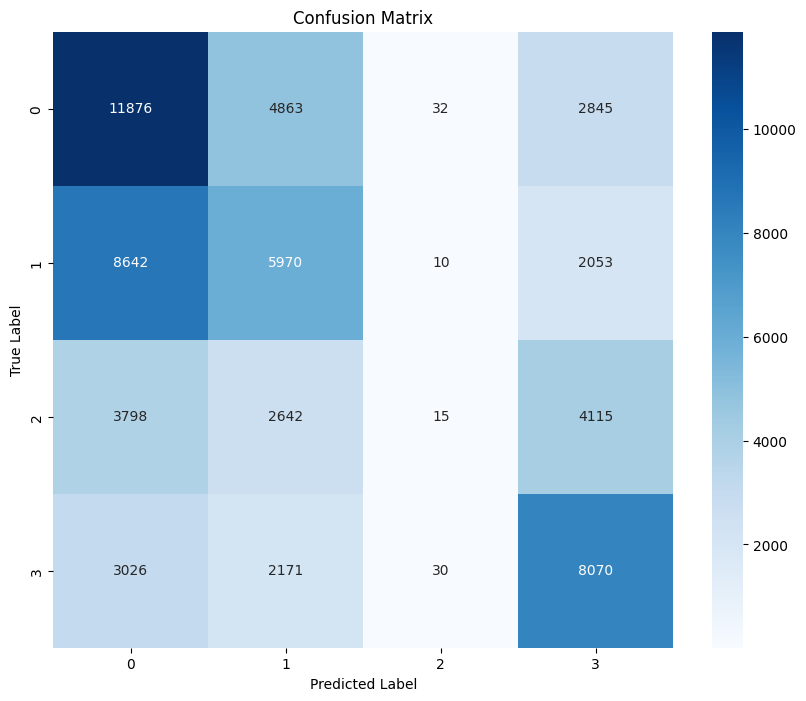

Classification Report for Training Set:
               precision    recall  f1-score   support

        0-20       0.43      0.60      0.50     80276
       21-30       0.38      0.36      0.37     69053
       31-40       0.19      0.00      0.00     43450
    above 40       0.50      0.62      0.55     58255

    accuracy                           0.44    251034
   macro avg       0.37      0.40      0.36    251034
weighted avg       0.39      0.44      0.39    251034

Classification Report for Test Set:
               precision    recall  f1-score   support

        0-20       0.43      0.61      0.51     19616
       21-30       0.38      0.36      0.37     16675
       31-40       0.17      0.00      0.00     10570
    above 40       0.47      0.61      0.53     13297

    accuracy                           0.43     60158
   macro avg       0.37      0.39      0.35     60158
weighted avg       0.38      0.43      0.39     60158


In [31]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
from resources.helpers import evaluate_model

best_model_softmax = LogisticRegression(multi_class="multinomial",solver="lbfgs", max_iter=100, C=grid_search.best_params_['C'])

evaluate_model(best_model_softmax, X_softmax_train, y_train, X_softmax_test, y_test)



In [32]:
from resources.helpers import save_or_load_model
save_or_load_model('save', model= best_model_softmax, file_path="best_model_softmax_v2")


Model saved to best_model_softmax_v2


The model does not show significant overfitting (0.01 difference), nonetheless the performance of the model is not optimal.

# 3. Train a DecisionTree model.

## (a) Perform features pre-processing if necessary. Discuss your choices and the performed actions.


Feature scaling or centering is not needed in decision tree models. Wether we scale the data or not the three will make the same splits.

## (b) Search for good hyperparameter values for the DecisionTreeClassifier: choose the hyperparameters you might tune and provide comments on your choice. Specify which hyperparameter might require a tuning procedure, and which is the effect of the tuning procedure on the final model.

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree


X_dt_train = X_train.copy(deep=True)
X_dt_test = X_test.copy(deep=True)


tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X_dt_train, y_train)

DecisionTreeClassifier(max_depth=2)

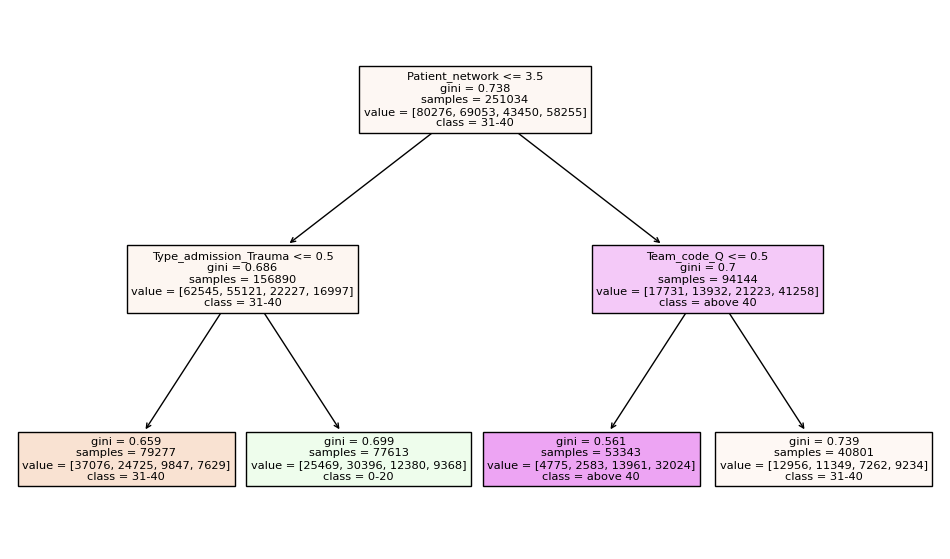

In [34]:
fig = plt.figure(figsize=(12,7))
_ = tree.plot_tree(tree_clf,
                   feature_names=X_dt_train.columns,
                   class_names = y_train.unique(),
                   filled=True)

In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters to tune
params = {
      'max_depth': [ 5, 10, 15],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [ 10, 20, 50],
    'min_samples_leaf': [5, 10, 20],
    'splitter': ['best'],
    'class_weight': ['balanced']
}

DT_gs_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), 
                        params, 
                        n_jobs=-1, 
                        verbose=1, 
                        cv=3)  
DT_gs_cv.fit(X_train, y_train)

best_params = DT_gs_cv.best_params_
best_model_dt = DT_gs_cv.best_estimator_

print("Best Parameters:", best_params)


Fitting 3 folds for each of 54 candidates, totalling 162 fits
Best Parameters: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 20, 'min_samples_split': 50, 'splitter': 'best'}


Test Accuracy: 0.51
Train Accuracy: 0.52
Weighted F1 Score (Test): 0.49
Weighted F1 Score (Train): 0.51


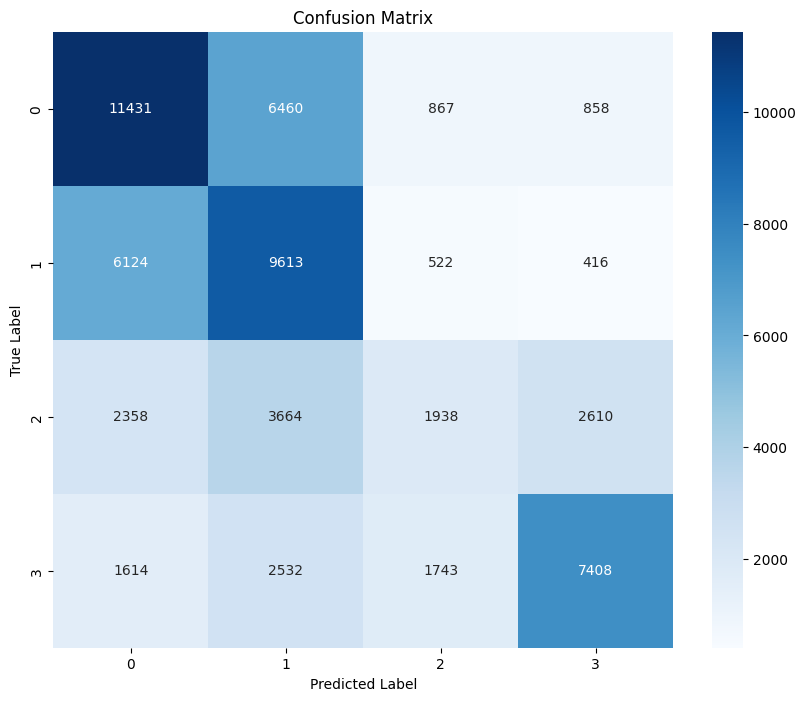

Classification Report for Training Set:
               precision    recall  f1-score   support

        0-20       0.54      0.59      0.56     80276
       21-30       0.44      0.58      0.50     69053
       31-40       0.41      0.20      0.27     43450
    above 40       0.69      0.59      0.64     58255

    accuracy                           0.52    251034
   macro avg       0.52      0.49      0.49    251034
weighted avg       0.52      0.52      0.51    251034

Classification Report for Test Set:
               precision    recall  f1-score   support

        0-20       0.53      0.58      0.56     19616
       21-30       0.43      0.58      0.49     16675
       31-40       0.38      0.18      0.25     10570
    above 40       0.66      0.56      0.60     13297

    accuracy                           0.51     60158
   macro avg       0.50      0.47      0.47     60158
weighted avg       0.50      0.51      0.49     60158


In [36]:
from resources.helpers import evaluate_model
evaluate_model(best_model_dt, X_dt_train, y_train, X_dt_test, y_test)

In [37]:
from resources.helpers import save_or_load_model
save_or_load_model('save', model= best_model_dt, file_path="best_model_dt_v1")


Model saved to best_model_dt_v1


The dt shows improved performance in but still has some issues in identifying instances belonging to the class '31-40'

# 4. Train a Random Forest model.

In [27]:
X_rf_train = X_train.copy(deep=True)
X_rf_test = X_test.copy(deep=True)


## (a) Perform features pre-processing if necessary. Discuss your choices and the performed actions.

No additional preprocessing is required as the features were already encoded in the correct way (without implying any ordinal relation when it is not present) and scaling is not required for three based models.

## (b) Search for good hyperparameter values for the RandomForestClassifier: choose the hyperparameters you might tune and provide comments on your choice. Specify which hyperparameter might require a tuning procedure (comment on the hyperparameters related to the ensemble only, since the ones related to the DecisionTree have been discussed above).

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators': [100, 300, 500],  # Number of trees in the forest
    'oob_score': [True],  # Whether to use out-of-bag samples to estimate the generalization accuracy
    'class_weight': ['balanced'],  # Weights associated with classes
    
    # control overfitting
    'max_depth': [2, 5, 10],  # Maximum depth of the tree
    'min_samples_split': [ 10, 20],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [5, 10],  # Minimum number of samples required to be at a leaf node
    
   
}

RF_gs_cv = GridSearchCV(RandomForestClassifier(random_state=42, bootstrap=True), 
                        params, 
                        n_jobs=-1, 
                        verbose=1, 
                        cv=3) 

RF_gs_cv.fit(X_rf_train, y_train)

best_params = RF_gs_cv.best_params_
best_model_rf = RF_gs_cv.best_estimator_

print("Best Parameters:", best_params)


Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best Parameters: {'class_weight': 'balanced', 'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 20, 'n_estimators': 100, 'oob_score': True}


## (c) Which are the 2 most important features for the trained model?

In [40]:
import numpy as np
importances = best_model_rf.feature_importances_
indices = np.argsort(importances)[::-1]

print(f"The most important feature is: {X_rf_train.columns[indices[0]]} with an importance of: {importances[indices[0]]:.4f}")
print(f"The second most important feature is: {X_rf_train.columns[indices[1]]} with an importance of: {importances[indices[1]]:.4f}")


The most important feature is: Patient_network with an importance of: 0.5544
The second most important feature is: Team_code_S with an importance of: 0.0601


## (d) Provide an out-of-bag evaluation of the trained model.

In [41]:
oob_score = best_model_rf.oob_score_
print(f"The out-of-bag score is: {round(oob_score, 4)}")


The out-of-bag score is: 0.5193


## (e) Evaluate the trained model on the provided test set. Verify that the trained model is not overfitting. Discuss the obtained results with the support of confusion matrices and classification reports.

Test Accuracy: 0.52
Train Accuracy: 0.53
Weighted F1 Score (Test): 0.49
Weighted F1 Score (Train): 0.51


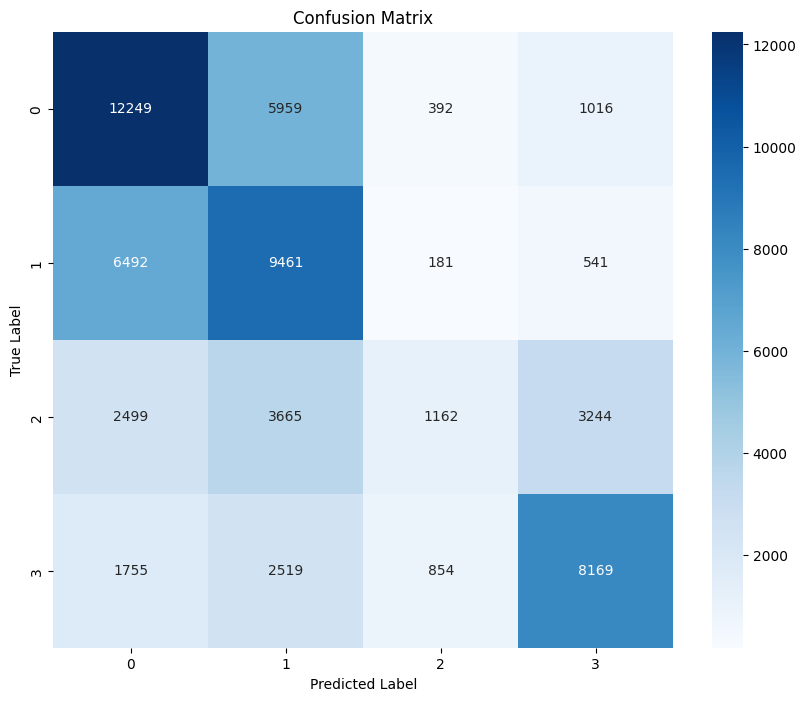

Classification Report for Training Set:
               precision    recall  f1-score   support

        0-20       0.54      0.63      0.58     80276
       21-30       0.45      0.58      0.50     69053
       31-40       0.50      0.13      0.20     43450
    above 40       0.66      0.65      0.65     58255

    accuracy                           0.53    251034
   macro avg       0.54      0.49      0.48    251034
weighted avg       0.53      0.53      0.51    251034

Classification Report for Test Set:
               precision    recall  f1-score   support

        0-20       0.53      0.62      0.57     19616
       21-30       0.44      0.57      0.49     16675
       31-40       0.45      0.11      0.18     10570
    above 40       0.63      0.61      0.62     13297

    accuracy                           0.52     60158
   macro avg       0.51      0.48      0.47     60158
weighted avg       0.51      0.52      0.49     60158


In [42]:
evaluate_model(best_model_rf, X_rf_train, y_train,X_rf_test, y_test)

In [43]:
from resources.helpers import save_or_load_model
save_or_load_model('save', model= best_model_rf, file_path="best_model_rf_v1")


Model saved to best_model_rf_v1


# 5. Train an AdaBoost model.

In [28]:
X_ab_train = X_train.copy(deep=True)
X_ab_test = X_test.copy(deep=True)


## (a) Perform features pre-processing if necessary. Discuss your choices and the performed actions.


no extra preprocessing needed

## (b) Search for good hyperparameter values for the AdaBoostClassifier: choose the hyperparameters you might tune and provide comments on your choice. Specify which hyper-parameter might require a tuning procedure.

In [46]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

# Hyperparameters grid
param_grid = {
    'base_estimator__max_depth': [1,  3,  5], 
    'n_estimators': [50, 100, 300, 400],      
    'learning_rate': [0.01, 0.1, 1.0]         
}

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(),
    algorithm="SAMME.R"
)

grid_search = GridSearchCV(ada_clf, param_grid, cv=3, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_ab_train, y_train)

print("Best parameters:", grid_search.best_params_)


/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:717: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**clone(parameters, safe=False))
/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:717: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**clone(parameters, safe=False))
/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:717: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**clone(parameters, safe=False))
/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/

Best parameters: {'base_estimator__max_depth': 5, 'learning_rate': 0.1, 'n_estimators': 300}


## (c) Evaluate the trained model on the provided test set. Verify that the trained model is not overfitting. Discuss the obtained results with the support of confusion matrices and classification reports.

Test Accuracy: 0.53
Train Accuracy: 0.54
Weighted F1 Score (Test): 0.50
Weighted F1 Score (Train): 0.51


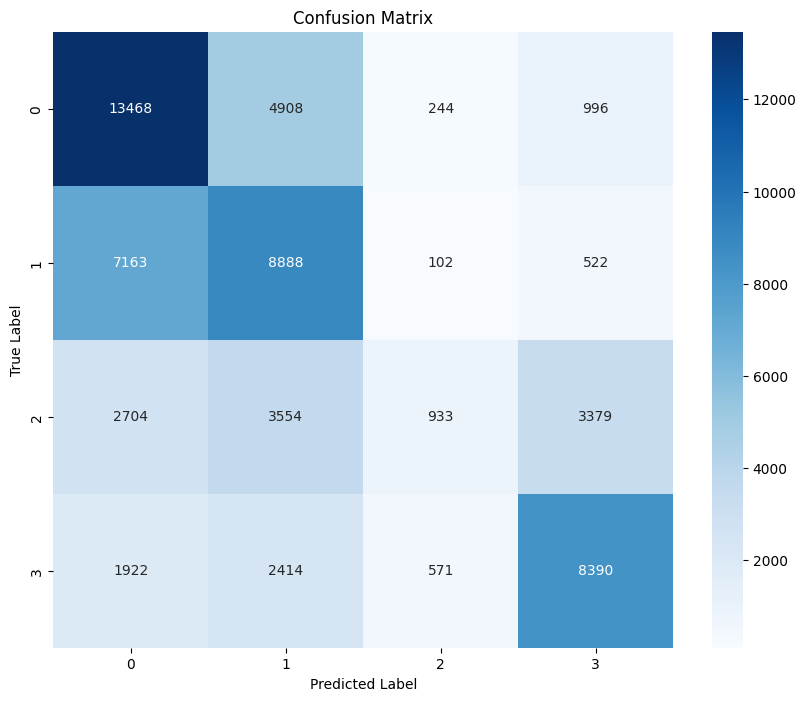

Classification Report for Training Set:
               precision    recall  f1-score   support

        0-20       0.54      0.69      0.60     80276
       21-30       0.46      0.55      0.50     69053
       31-40       0.54      0.10      0.17     43450
    above 40       0.66      0.66      0.66     58255

    accuracy                           0.54    251034
   macro avg       0.55      0.50      0.48    251034
weighted avg       0.55      0.54      0.51    251034

Classification Report for Test Set:
               precision    recall  f1-score   support

        0-20       0.53      0.69      0.60     19616
       21-30       0.45      0.53      0.49     16675
       31-40       0.50      0.09      0.15     10570
    above 40       0.63      0.63      0.63     13297

    accuracy                           0.53     60158
   macro avg       0.53      0.48      0.47     60158
weighted avg       0.53      0.53      0.50     60158


In [47]:
best_model_ab = grid_search.best_estimator_

evaluate_model(best_model_ab, X_ab_train, y_train, X_ab_test, y_test)



In [48]:
from resources.helpers import save_or_load_model
save_or_load_model('save', model= best_model_ab, file_path="best_model_ab_v1")


Model saved to best_model_ab_v1


# 6. Train a Soft Voting Classifier model.

In [ ]:
X_sv_train = X_train.copy(deep=True)
X_sv_test = X_test.copy(deep=True)
from resources.helpers import scale_features
scale_features(X_sv_train, X_sv_test, 'robust')


## (a) Combine the models trained above into an ensemble, using a soft voting classifier. Select the models that allow soft voting and comment on this choice. Eventually include other models (trained with different algorithms) in the ensemble.

In [49]:
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB  
from resources.helpers import save_or_load_model

knn_model = KNeighborsClassifier()
knn_model.fit(X_sv_train, y_train)

nb_model = GaussianNB()
nb_model.fit(X_sv_train, y_train)

best_model_rf = save_or_load_model('load', file_path="best_model_rf_v1")
best_model_ab = save_or_load_model('load', file_path="best_model_ab_v1")
best_model_softmax = save_or_load_model('load', file_path="best_model_softmax_v1")
best_model_dt = save_or_load_model('load', file_path="best_model_dt_v1")

voting_clf = VotingClassifier(
    estimators=[('rf', best_model_rf), ('ada', best_model_ab), ('lr', best_model_softmax), ('dt', best_model_dt), ('knn', knn_model), ('nb', nb_model)], 
    voting='soft'
)
voting_clf.fit(X_sv_train, y_train)



Model loaded from best_model_rf_v1
Model loaded from best_model_ab_v1
Model loaded from best_model_softmax_v1
Model loaded from best_model_dt_v1


/Users/lorenzodeappolonia/.local/share/virtualenvs/supervised_final_project-sVMpp1xw/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(class_weight='balanced',
                                                     max_depth=10,
                                                     min_samples_leaf=5,
                                                     min_samples_split=20,
                                                     oob_score=True,
                                                     random_state=42)),
                             ('ada',
                              AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=5),
                                                 learning_rate=0.1,
                                                 n_estimators=300)),
                             ('lr',
                              LogisticRegression(C=0.001,
                                                 multi_class='multinomial')),
                             ('dt',
                              DecisionTreeClassifier(class_weight='balanced',
                                                     max_depth=10,
                                                     min_samples_leaf=20,
                                                     min_samples_split=50,
                                                     random_state=42)),
                             ('knn', KNeighborsClassifier()),
                             ('nb', GaussianNB())],
                 voting='soft')

## (b) Evaluate the trained model on the provided test set. Discuss the obtained results with the support of confusion matrices and classification reports.

/Users/lorenzodeappolonia/.local/share/virtualenvs/supervised_final_project-sVMpp1xw/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Test Accuracy: 0.49
Train Accuracy: 0.57
Weighted F1 Score (Test): 0.47
Weighted F1 Score (Train): 0.55


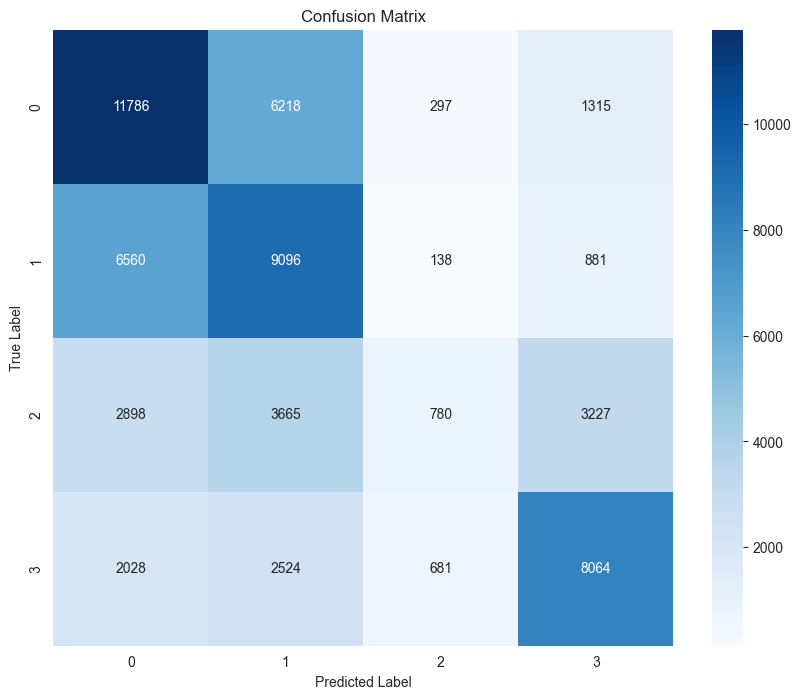

Classification Report for Training Set:
               precision    recall  f1-score   support

        0-20       0.58      0.68      0.63     80276
       21-30       0.50      0.64      0.56     69053
       31-40       0.68      0.14      0.23     43450
    above 40       0.66      0.67      0.67     58255

    accuracy                           0.57    251034
   macro avg       0.61      0.53      0.52    251034
weighted avg       0.59      0.57      0.55    251034
Classification Report for Test Set:
               precision    recall  f1-score   support

        0-20       0.51      0.60      0.55     19616
       21-30       0.42      0.55      0.48     16675
       31-40       0.41      0.07      0.13     10570
    above 40       0.60      0.61      0.60     13297

    accuracy                           0.49     60158
   macro avg       0.48      0.46      0.44     60158
weighted avg       0.49      0.49      0.47     60158


In [50]:
from resources.helpers import evaluate_model
evaluate_model(voting_clf, X_sv_train, y_train, X_sv_test, y_test)

In [51]:
from resources.helpers import save_or_load_model
save_or_load_model('save', model= voting_clf, file_path="best_model_voting_clf_v3_no_knn_nb")


Model saved to best_model_voting_clf_v3_no_knn_nb


## (c) Does the voting classifier perform better than the individual classifiers?

The model underperforms the other classifiers due to significant overfitting to the training set. The overfitting is probably due by a high complexity generated by the use of models such as the random forest in the voting process.

# 7. Train a Blender classifier.

In [30]:
X_blender_train = X_train.copy(deep=True)
X_blender_test = X_test.copy(deep=True)


## (a) Exploit the predictions performed by a set of models: a Softmax Regression model, a Decision Tree model, a Random Forest model, and an AdaBoost model. Use the best hyperparameter values identified above for all the ex- ploited models.


## (b) Train a blender model exploiting the data generated in the previous task and evaluate it. Consider splitting the dataset properly for the training of the different layers of the stack and for the evaluation of the final ensemble model.

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

X_train_base, X_train_blender, y_train_base, y_train_blender = train_test_split(X_blender_train, y_train, test_size=0.5, random_state=42)

best_model_softmax.fit(X_train_base, y_train_base)
best_model_dt.fit(X_train_base, y_train_base)
best_model_rf.fit(X_train_base, y_train_base)
best_model_ab.fit(X_train_base, y_train_base)

preds_softmax = best_model_softmax.predict_proba(X_train_blender)
preds_dt = best_model_dt.predict_proba(X_train_blender)
preds_rf = best_model_rf.predict_proba(X_train_blender)
preds_ab = best_model_ab.predict_proba(X_train_blender)

import numpy as np
X_train_blender = np.hstack((preds_softmax, preds_dt, preds_rf, preds_ab))

blender = RandomForestClassifier(n_estimators=100, random_state=42)  
blender.fit(X_train_blender, y_train_blender)

print(preds_softmax.shape, preds_dt.shape, preds_rf.shape, preds_ab.shape)


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(125517, 4) (125517, 4) (125517, 4) (125517, 4)


## (c) Evaluate the trained stacking ensemble model on the provided test set. Dis- cuss the obtained results with the support of confusion matrices and classifi- cation reports.

Accuracy: 0.51
F1 Score: 0.49
Classification Report:
               precision    recall  f1-score   support

        0-20       0.52      0.65      0.58     19616
       21-30       0.44      0.50      0.47     16675
       31-40       0.39      0.18      0.24     10570
    above 40       0.63      0.58      0.61     13297

    accuracy                           0.51     60158
   macro avg       0.50      0.48      0.47     60158
weighted avg       0.50      0.51      0.49     60158


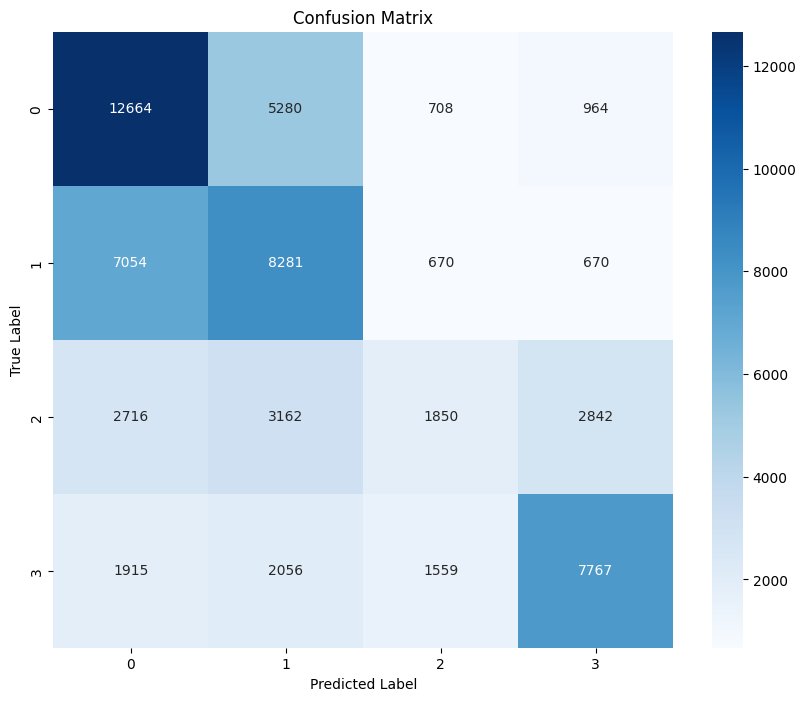

In [55]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

preds_softmax_test = best_model_softmax.predict_proba(X_test)
preds_dt_test = best_model_dt.predict_proba(X_test)
preds_rf_test = best_model_rf.predict_proba(X_test)
preds_ab_test = best_model_ab.predict_proba(X_test)

X_test_blender = np.hstack((preds_softmax_test, preds_dt_test, preds_rf_test, preds_ab_test))

y_pred_blender = blender.predict(X_test_blender)

accuracy = accuracy_score(y_test, y_pred_blender)
f1 = f1_score(y_test, y_pred_blender, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred_blender)
class_report = classification_report(y_test, y_pred_blender)

print(f'Accuracy: {accuracy:.2f}')
print(f'F1 Score: {f1:.2f}')
print('Classification Report:\n', class_report)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [56]:
from resources.helpers import save_or_load_model
save_or_load_model('save', model= blender, file_path="blender_v1")


Model saved to blender_v1


# 8. Compare the performances of the previously trained classifiers and ensemble models evaluating them on the provided test set.


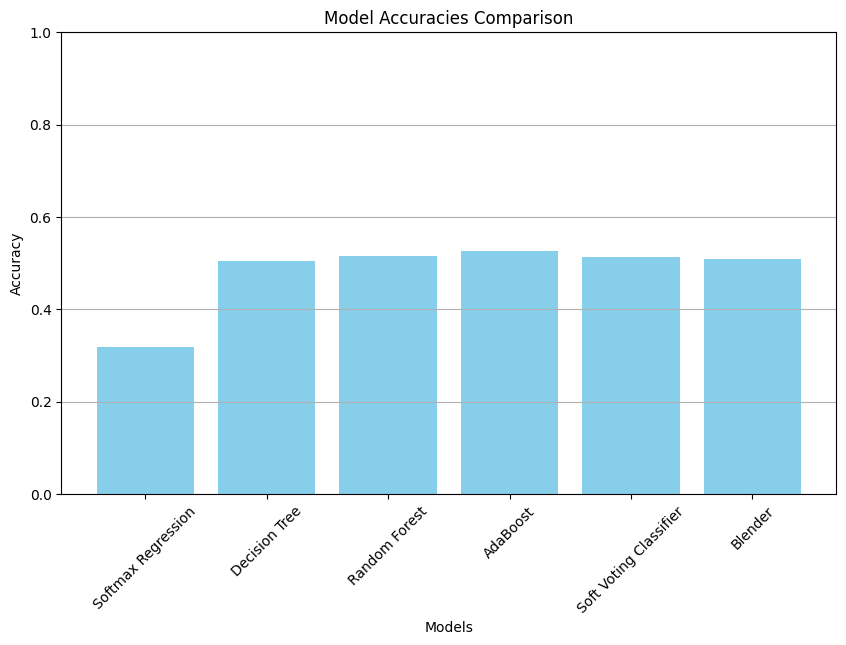

In [44]:
import pickle
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt

def load_model(file_path):
    with open(file_path, 'rb') as file:
        return pickle.load(file)

model_details = {
    'Softmax Regression': {'file_path': 'best_model_softmax_v1', 'data': X_softmax_test},
    'Decision Tree': {'file_path': 'best_model_dt_v1', 'data': X_dt_test},
    'Random Forest': {'file_path': 'best_model_rf_v1', 'data': X_rf_test},
    'AdaBoost': {'file_path': 'best_model_ab_v1', 'data': X_ab_test},
    'Soft Voting Classifier': {'file_path': 'best_model_voting_clf_v1', 'data': X_sv_test},
}

model_accuracies = {}
for model_name, details in model_details.items():
    model = load_model(details['file_path'])
    X_test = details['data']
    y_pred_test = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred_test)
    model_accuracies[model_name] = accuracy

# blender added manually for speed and coding reasons
model_accuracies['Blender'] = 0.51

plt.figure(figsize=(10, 6))
plt.bar(model_accuracies.keys(), model_accuracies.values(), color='skyblue')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracies Comparison')
plt.xticks(rotation=45)
plt.ylim([0, 1])
plt.grid(axis='y')
plt.show()

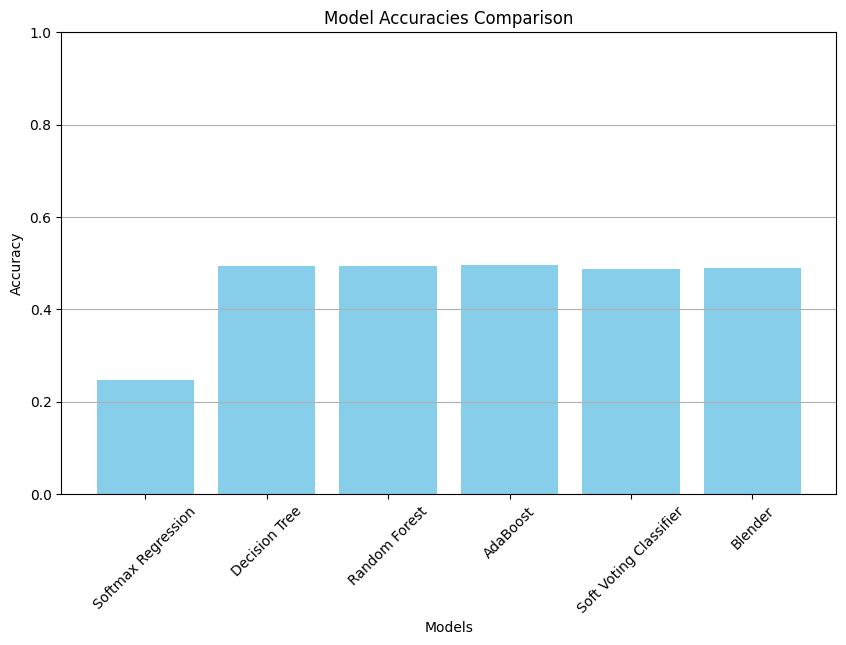

In [45]:
import pickle
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt

def load_model(file_path):
    with open(file_path, 'rb') as file:
        return pickle.load(file)


model_details = {
    'Softmax Regression': {'file_path': 'best_model_softmax_v1', 'data': X_softmax_test},
    'Decision Tree': {'file_path': 'best_model_dt_v1', 'data': X_dt_test},
    'Random Forest': {'file_path': 'best_model_rf_v1', 'data': X_rf_test},
    'AdaBoost': {'file_path': 'best_model_ab_v1', 'data': X_ab_test},
    'Soft Voting Classifier': {'file_path': 'best_model_voting_clf_v1', 'data': X_sv_test},
}

model_accuracies = {}
for model_name, details in model_details.items():
    model = load_model(details['file_path'])
    X_test = details['data']
    y_pred_test = model.predict(X_test)
    accuracy = f1_score(y_test, y_pred_test, average='weighted')
    model_accuracies[model_name] = accuracy

model_accuracies['Blender'] = 0.49

plt.figure(figsize=(10, 6))
plt.bar(model_accuracies.keys(), model_accuracies.values(), color='skyblue')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracies Comparison')
plt.xticks(rotation=45)
plt.ylim([0, 1])
plt.grid(axis='y')
plt.show()

The results suggest that the Softmax Regression model performs significantly worse than the other models, as per expectation, indicating that the data cannot be separated linearly. Random Forest and AdaBoost show slight improvements over the simple Decision Tree, which indicates their robustness in handling complex patterns. The Soft Voting Classifier and Blender model do not show a significant accuracy advantage suggesting that combining predictions through these  techniques does not translate into  better performance for this dataset. Contrary to expectations the ensemble methods do not always perform better than the single classifiers, nonetheless the AdaBoost is shown to be the best model.


# 9. Build a Regression model, optimize its hyperparameters, and evaluate its perfor- mance over the test set. The model will output a continuous value, you should encode each value in the best-matching target class and evaluate the model con- sidering classification prediction metrics. Finally, compare the performance with respect to the best model trained in the previous points. Discuss the obtained results with the support of confusion matrices and classification reports.

In [29]:
import pandas as pd

test = pd.read_csv('data/TestSet.csv')
train = pd.read_csv('data/TrainingSet.csv')

## PREPROCESSING

In [30]:
# DROP UNINFORMATIVE:  

train.drop('case_id',axis=1 ,inplace=True)
train.drop('patient_id',axis=1,inplace=True)

test.drop('case_id', axis=1,inplace=True)
test.drop('patient_id', axis=1,inplace=True)

# OUTLIERS:

k = 3

upper_lim_deposit = train['Deposit'].mean () + train['Deposit'].std () * k
lower_lim_deposit = train['Deposit'].mean () - train['Deposit'].std () * k

upper_lim_Available_nurse = train['Available_nurse'].mean () + train['Available_nurse'].std () * k
lower_lim_Available_nurse = train['Available_nurse'].mean () - train['Available_nurse'].std () * k

upper_lim_Patient_network = train['Patient_network'].mean () + train['Patient_network'].std () * k
lower_lim_Patient_network = train['Patient_network'].mean () - train['Patient_network'].std () * k




test = test[(test['Deposit'] < upper_lim_deposit) & (test['Deposit'] > lower_lim_deposit)]
test = test[(test['Available_nurse'] < upper_lim_Available_nurse) & (test['Available_nurse'] > lower_lim_Available_nurse)]
test = test[(test['Patient_network'] < upper_lim_Patient_network) & (test['Patient_network'] > lower_lim_Patient_network)]

test = test[(test['Deposit'] < upper_lim_deposit) & (test['Deposit'] > lower_lim_deposit)]
test = test[(test['Available_nurse'] < upper_lim_Available_nurse) & (test['Available_nurse'] > lower_lim_Available_nurse)]
test = test[(test['Patient_network'] < upper_lim_Patient_network) & (test['Patient_network'] > lower_lim_Patient_network)]

# ENCODING 

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder


categorical_features = ['Spitex_type_code', 'City_code', 'Treatment', 'Team_code', 'Team_location_code', 'Type_admission']  

one_hot_encoder = OneHotEncoder()

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', one_hot_encoder, categorical_features)  
    ],
    remainder='passthrough'  
)

train_encoded = preprocessor.fit_transform(train)
test_encoded = preprocessor.transform(test)  # Assuming 'test' is your test dataset

new_columns = preprocessor.transformers_[0][1].get_feature_names_out(categorical_features) \
              .tolist() + train.drop(columns=categorical_features).columns.tolist()

train = pd.DataFrame(train_encoded, columns=new_columns)
test = pd.DataFrame(test_encoded, columns=new_columns)



dictionary={"Severity": {"Minor":0, "Moderate":1, "Extreme":2}, "Age": {"0-10":0, "11-20":1, "21-30":2, "31-40": 3 , "41-50": 4, "51-60": 5 , "61-70": 6, "71-80": 7,"81-90": 8, "91-100": 9 }}
train.replace(dictionary, inplace=True)
test.replace(dictionary, inplace=True)




In [31]:
# BINNING FOR V2 of logistic and V1 of the rest

def label_duration(duration_str):

    if duration_str in ['0-10', '11-20']:
        return '0-20'
    
    elif '-' in duration_str:
        low, high = map(int, duration_str.split('-'))
        if low > 40:
            return 'above 40'
        
    elif duration_str == "More than 100 Days":
        return 'above 40'
    
    elif float(duration_str) > 40:
        return 'above 40'
    
    return duration_str

train['Duration'] = train['Duration'].apply(label_duration)
test['Duration'] = test['Duration'].apply(label_duration)


In [32]:
def convert_duration_to_avg(duration_str):
    if '-' in duration_str:
        low, high = duration_str.split('-')
        return (int(low) + int(high)) / 2
    elif duration_str == "above 40":
        return 40 
    else:
        return float(duration_str)

train['Duration'] = train['Duration'].apply(convert_duration_to_avg)




 ## SPLIT

In [33]:
from sklearn.model_selection import train_test_split

X = train.drop(columns=['Duration'], axis=1)
y = train['Duration']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


X_test = test.drop(columns=['Duration'], axis=1)
y_test = test['Duration']




## SCALE MODEL

In [34]:
from sklearn.preprocessing import RobustScaler

sc_X = RobustScaler()
X_train_scaled = sc_X.fit_transform(X_train)
X_test_scaled = sc_X.transform(X_test)
X_val_scaled = sc_X.transform(X_val)

# BUILD NEURAL NETWORK MODEL

In [25]:
import tensorflow as tf
from tensorflow import keras

model = keras.models.Sequential([
    keras.layers.Dense(300, activation="relu", input_shape=X_train_scaled.shape[1:]),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(100, activation="relu"),

    keras.layers.Dense(1)  # Single neuron for regression output
])

model.compile(optimizer='adam', loss='mean_squared_error')

history = model.fit(X_train_scaled, y_train, epochs=15, validation_data=(X_val_scaled, y_val))

val_loss = model.evaluate(X_val_scaled, y_val)
print("Validation Loss: ", val_loss)

y_pred = model.predict(X_test_scaled)


Epoch 1/15
6276/6276 [==============================] - 10s 1ms/step - loss: 125.8299 - val_loss: 122.6869
Epoch 2/15
6276/6276 [==============================] - 8s 1ms/step - loss: 122.6039 - val_loss: 122.0383
Epoch 3/15
6276/6276 [==============================] - 7s 1ms/step - loss: 121.4491 - val_loss: 121.5913
Epoch 4/15
6276/6276 [==============================] - 8s 1ms/step - loss: 120.7300 - val_loss: 121.0227
Epoch 5/15
6276/6276 [==============================] - 9s 1ms/step - loss: 120.1523 - val_loss: 120.5886
Epoch 6/15
6276/6276 [==============================] - 8s 1ms/step - loss: 119.6422 - val_loss: 120.7796
Epoch 7/15
6276/6276 [==============================] - 9s 1ms/step - loss: 119.3495 - val_loss: 120.2817
Epoch 8/15
6276/6276 [==============================] - 8s 1ms/step - loss: 118.8863 - val_loss: 121.1149
Epoch 9/15
6276/6276 [==============================] - 9s 1ms/step - loss: 118.5981 - val_loss: 120.2708
Epoch 10/15
6276/6276 [======================

## Optimize number of neurons in first layer

In [35]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import mean_squared_error

def build_model(n_neurons=100):
    model = keras.models.Sequential([
        keras.layers.Dense(n_neurons, activation="relu", input_shape=X_train_scaled.shape[1:]),
        keras.layers.Dense(100, activation="relu"),
        keras.layers.Dense(100, activation="relu"),
        keras.layers.Dense(1)  # Single neuron for regression output
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

neuron_options = [50, 100, 150, 200]
performance = {}

for neurons in neuron_options:
    model = build_model(n_neurons=neurons)
    history = model.fit(X_train_scaled, y_train, epochs=15, validation_data=(X_val_scaled, y_val), verbose=0)
    
    val_loss = model.evaluate(X_val_scaled, y_val, verbose=0)
    
    performance[neurons] = val_loss
    print(f"Validation loss with {neurons} neurons: {val_loss}")

best_neuron_count = min(performance, key=performance.get)
print(f"Best neuron count is: {best_neuron_count}")
final_model = build_model(n_neurons=best_neuron_count)
final_history = final_model.fit(X_train_scaled, y_train, epochs=15, validation_data=(X_val_scaled, y_val))



Validation loss with 50 neurons: 95.3915023803711
Validation loss with 100 neurons: 95.31423950195312
Validation loss with 150 neurons: 95.20889282226562
Validation loss with 200 neurons: 95.02186584472656
Best neuron count is: 200
Epoch 1/15
6276/6276 [==============================] - 4s 570us/step - loss: 104.1760 - val_loss: 97.5528
Epoch 2/15
6276/6276 [==============================] - 4s 613us/step - loss: 97.4157 - val_loss: 97.6521
Epoch 3/15
6276/6276 [==============================] - 4s 629us/step - loss: 96.2309 - val_loss: 97.2423
Epoch 4/15
6276/6276 [==============================] - 4s 578us/step - loss: 95.4352 - val_loss: 95.5749
Epoch 5/15
6276/6276 [==============================] - 4s 617us/step - loss: 94.9381 - val_loss: 95.5974
Epoch 6/15
6276/6276 [==============================] - 4s 594us/step - loss: 94.4681 - val_loss: 95.3755
Epoch 7/15
6276/6276 [==============================] - 4s 599us/step - loss: 94.1074 - val_loss: 95.0161
Epoch 8/15
6276/6276 [===

# CONVERT BACK TO CATHEGORICAL

In [36]:
def numerical_to_duration(duration_num):
    if duration_num <= 20:
        return '0-20'
    elif 20 < duration_num <= 30:
        return '21-30'
    elif 30 < duration_num <= 40:
        return '31-40'
    elif duration_num > 40:
        return 'above 40'
    else:
        return 'Uncategorized'

y_pred_numerical = final_model.predict(X_test_scaled).flatten()  # Flatten if it's 2D
y_pred_categorical = [numerical_to_duration(pred) for pred in y_pred_numerical]

# Check some predictions
print("Sample numerical predictions:", y_pred_numerical[:10])
print("Sample categorical predictions:", y_pred_categorical[:10])




1880/1880 [==============================] - 1s 281us/step
Sample numerical predictions: [28.39242  25.760983 20.447876 19.014727 31.052372 19.097073 36.080605
 21.220757 33.749752 39.18596 ]
Sample categorical predictions: ['21-30', '21-30', '21-30', '0-20', '31-40', '0-20', '31-40', '21-30', '31-40', '31-40']


## Compare results

Test Accuracy: 0.42451544266764185

Classification Report:
               precision    recall  f1-score   support

        0-20       0.59      0.48      0.53     19616
       21-30       0.39      0.69      0.50     16675
       31-40       0.29      0.38      0.33     10570
    above 40       0.87      0.04      0.08     13297

    accuracy                           0.42     60158
   macro avg       0.54      0.40      0.36     60158
weighted avg       0.54      0.42      0.39     60158


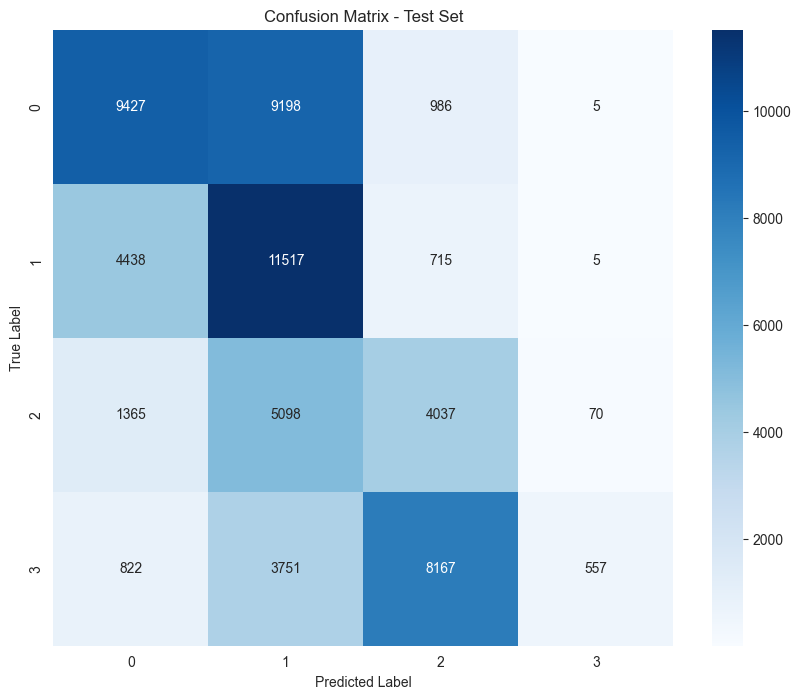

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


test_accuracy = accuracy_score(y_test, y_pred_categorical)
print("Test Accuracy:", test_accuracy)

y_pred_numerical_train = final_model.predict(X).flatten()  # Flatten if it's 2D
y_pred_categorical_train = [numerical_to_duration(pred) for pred in y_pred_numerical]



print("\nClassification Report:\n", classification_report(y, y_pred_categorical_train))
conf_matrix = confusion_matrix(y_test, y_pred_categorical)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=plt.cm.Blues)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Test Set')
plt.show()

   

Confusion matrix and evaluation metrics of the Adaboost classifier can be seen at point 5 (c)

The regression model is gratly outperformed by the Adaboost classifier. This difference in performance is probably due to the approximation needed to use the regression model on categorical data, trough which a lot of information is lost.

Initally the target class for the regression model was binned in the same way as for the classification model but this did not improve the performance. The reason for this is that the model predicts a continuous outcome and therefore it is not directly affected by the imbalamce in the classes. Additionally, wider classes with more values imply more approximation when converting the predictions of the regression model back to the respective classes.